### THAILAND CO2 EMISSIONS


In [ ]:
## Imports:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
## LOADING THE DATASET:

data = pd.read_csv('/content/EMISSION_DATA.csv')


In [ ]:
## TO KNOW ABOUT THE DATA:

print(data.columns)

print("#----------------------------------------------------#")
print("YEARS: ",data['year'].unique())
print("MONTHS :",data['month'].unique())
print("SOURCE :" ,data['source'].unique())
print("FUEL_TYPE :",data['fuel_type'].unique())
print("EMISSION_TONS :",data['emissions_tons'].unique())


Index(['year', 'month', 'source', 'fuel_type', 'emissions_tons'], dtype='object')
#----------------------------------------------------#
YEARS:  [1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000
 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016 2017 2018 2019 2020 2021 2022]
MONTHS : [ 1  2  3  4  5  6  7  8  9 10 11 12]
SOURCE : ['transport' 'industry' 'other']
FUEL_TYPE : ['oil' 'coal' 'natural_gas']
EMISSION_TONS : [1588.61 1428.29 1581.16 ... 1612.04 1539.67 1553.15]


In [ ]:
## TO CHECK THE DATASET HAS ANY NULL VALUES:

data.isnull().sum()

year              0
month             0
source            0
fuel_type         0
emissions_tons    0
dtype: int64

### EXPLORATORY DATA ANALYSIS


In [ ]:
## WHICH SECTOR EMITTES MORE AMOUNT OF CARBON

transport_data = data.loc[data['source'] == 'transport']
industry_data = data.loc[data['source']=='industry']
other_data=data.loc[data['source']=='other']




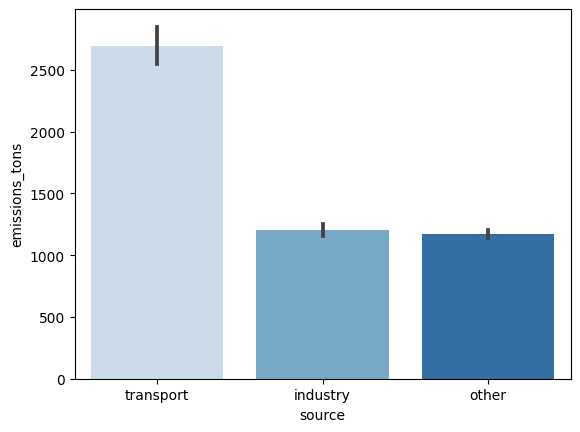

In [ ]:
## AVERAGE AMOUNT OF CO_2 EMISSIONS FROM THE SOURCE_TYPE:

sns.barplot(x = 'source',
            y = 'emissions_tons',
            palette = 'Blues',
            data = data)

# Show the plot
plt.show()

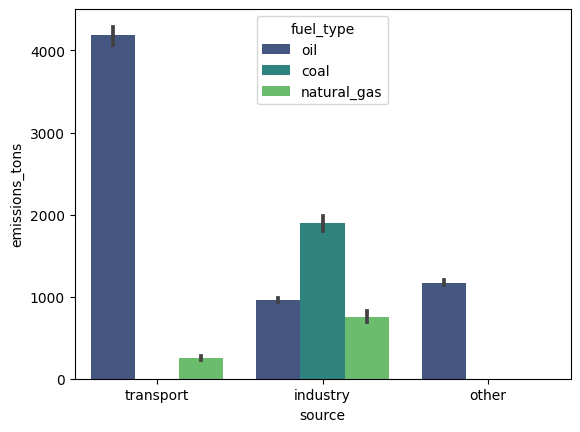

In [ ]:
## AVERAGE AMOUNT OF CO_2 EMISSIONS FROM EACH FUEL TYPE

sns.barplot(x = 'source',
            y = 'emissions_tons',
            hue = 'fuel_type',
            palette = 'viridis',
            data = data)

# Show the plot
plt.show()

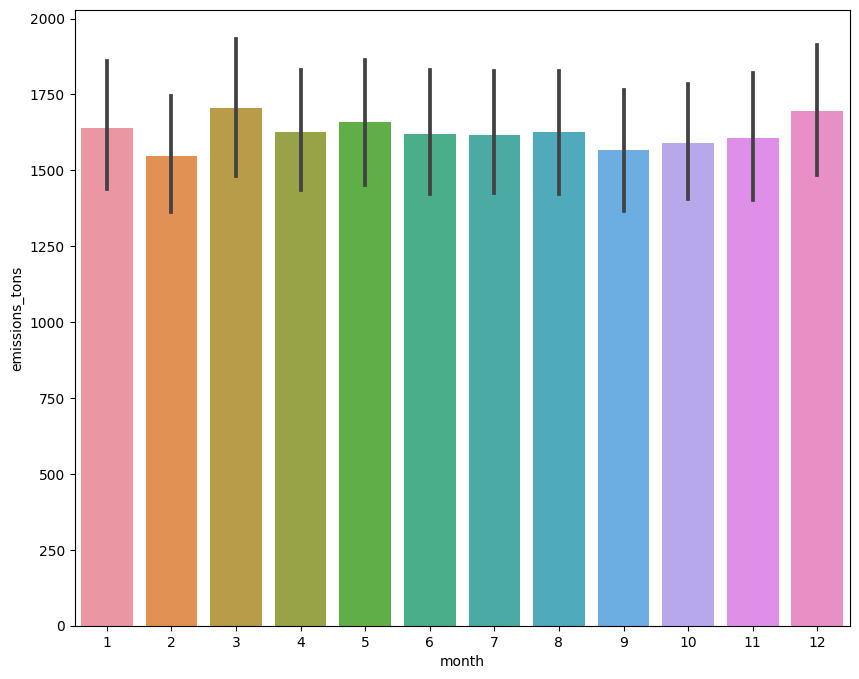

In [ ]:
## WHICH MONTH HAS MORE AMOUNT OF CO2 EMISSIONS??


plt.figure(figsize=(10,8))

sns.barplot(x = 'month',
            y = 'emissions_tons',
            data = data)

# Show the plot
plt.show()


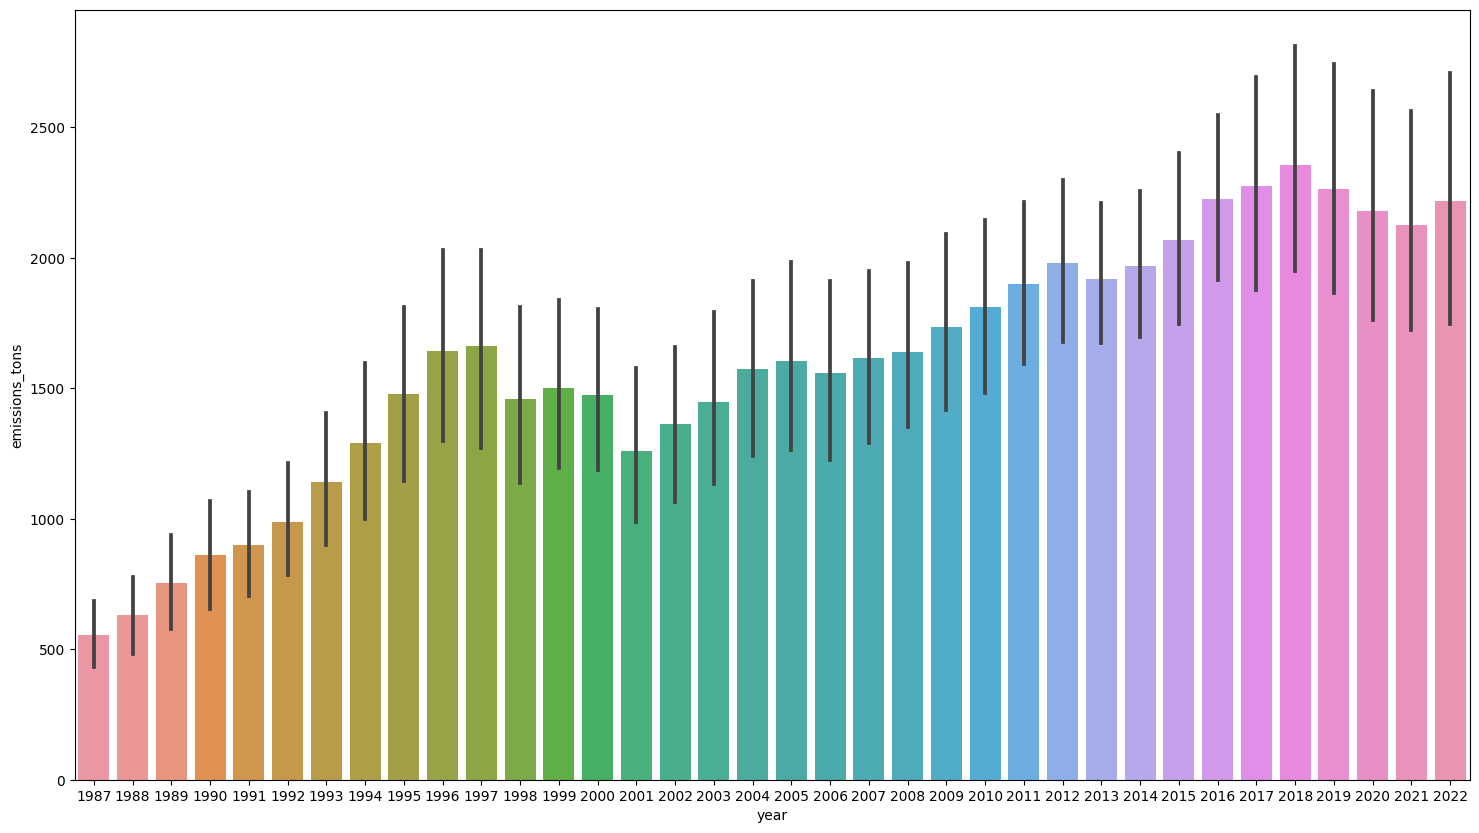

In [ ]:
## TO CHECK WHICH YEAR EMITS MORE CO2 EMISSIONS:
## DISPLAYS AVERAGE AMOUNT

plt.figure(figsize=(18,10))

sns.barplot(x = 'year',
            y = 'emissions_tons',
            data = data)

# Show the plot
plt.show()



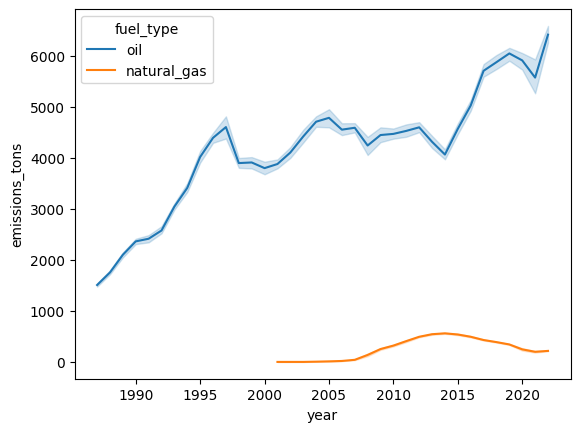

In [ ]:
## PLOTTING THE CO2 EMISSIONS BY YEAR:

## FOR TRANSPORT:

sns.lineplot(x="year", y="emissions_tons",
             hue="fuel_type",
             data=transport_data)

plt.show()

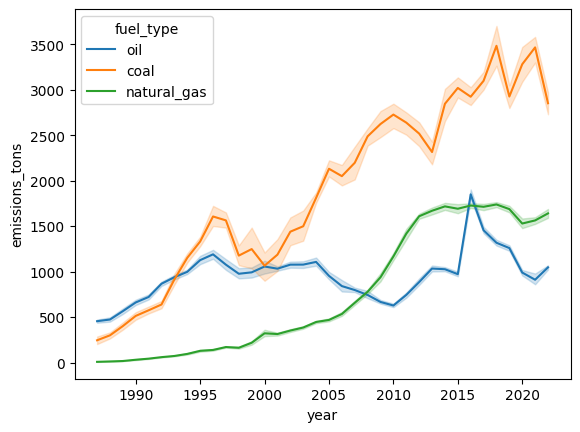

In [ ]:
## PLOTTING THE CO2 EMISSIONS BY YEAR:

## FOR TRANSPORT:

sns.lineplot(x="year", y="emissions_tons",
             hue="fuel_type",
             data=industry_data)

plt.show()

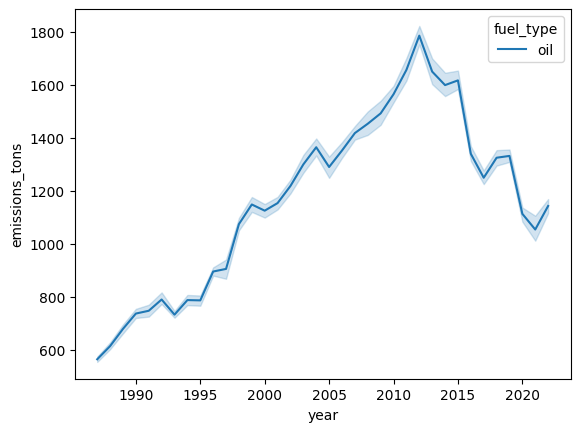

In [ ]:
## PLOTTING THE CO2 EMISSIONS BY YEAR:

## FOR OTHER:

sns.lineplot(x="year", y="emissions_tons",
             hue="fuel_type",
             data=other_data
             )

plt.show()

### TIME SERIES

In [ ]:
## RESTRUCTURING THE TRANSPORT DATASET:

## PREDICTING THE EMISSION OF CO2 FROM TRANSPORT:

transport_oil_data = transport_data.loc[transport_data['fuel_type'] == 'oil']


In [ ]:
transport_oil_data

transport_oil_data = transport_oil_data.drop(['source','fuel_type'],axis=1)
transport_oil_data

year  month  emissions_tons
0    1987      1         1588.61
1    1987      2         1428.29
2    1987      3         1581.16
3    1987      4         1557.40
4    1987      5         1513.35
..    ...    ...             ...
427  2022      8         6276.48
428  2022      9         6147.11
429  2022     10         6354.09
430  2022     11         6654.37
431  2022     12         7076.27

[432 rows x 3 columns]

In [ ]:
date_month = []


for i in range(0,len(transport_oil_data)):
  date_month.append(str(transport_oil_data['year'][i])+"-"+str(transport_oil_data['month'][i]))

print(date_month)

transport_oil_data['date'] = date_month
transport_oil_data["date"]=pd.to_datetime(transport_oil_data["date"])
transport_oil_data.set_index("date",inplace=True)
transport_oil_data

#data['date_column'] = pd.to_datetime(data['date_column'], format='%Y-%m')
#data['date_column'] = pd.to_datetime(data['date_column'])
#transport_oil_data['date'] = pd.to_datetime(transport_oil_data['date'])
#transport_oil_data['date'] = transport_oil_data['date'].apply(lambda x: x.strftime('%Y-%m-%d'))

#transport_oil_data= transport_oil_data.set_index('date')

['1987-1', '1987-2', '1987-3', '1987-4', '1987-5', '1987-6', '1987-7', '1987-8', '1987-9', '1987-10', '1987-11', '1987-12', '1988-1', '1988-2', '1988-3', '1988-4', '1988-5', '1988-6', '1988-7', '1988-8', '1988-9', '1988-10', '1988-11', '1988-12', '1989-1', '1989-2', '1989-3', '1989-4', '1989-5', '1989-6', '1989-7', '1989-8', '1989-9', '1989-10', '1989-11', '1989-12', '1990-1', '1990-2', '1990-3', '1990-4', '1990-5', '1990-6', '1990-7', '1990-8', '1990-9', '1990-10', '1990-11', '1990-12', '1991-1', '1991-2', '1991-3', '1991-4', '1991-5', '1991-6', '1991-7', '1991-8', '1991-9', '1991-10', '1991-11', '1991-12', '1992-1', '1992-2', '1992-3', '1992-4', '1992-5', '1992-6', '1992-7', '1992-8', '1992-9', '1992-10', '1992-11', '1992-12', '1993-1', '1993-2', '1993-3', '1993-4', '1993-5', '1993-6', '1993-7', '1993-8', '1993-9', '1993-10', '1993-11', '1993-12', '1994-1', '1994-2', '1994-3', '1994-4', '1994-5', '1994-6', '1994-7', '1994-8', '1994-9', '1994-10', '1994-11', '1994-12', '1995-1', '1995

year  month  emissions_tons
date                                   
1987-01-01  1987      1         1588.61
1987-02-01  1987      2         1428.29
1987-03-01  1987      3         1581.16
1987-04-01  1987      4         1557.40
1987-05-01  1987      5         1513.35
...          ...    ...             ...
2022-08-01  2022      8         6276.48
2022-09-01  2022      9         6147.11
2022-10-01  2022     10         6354.09
2022-11-01  2022     11         6654.37
2022-12-01  2022     12         7076.27

[432 rows x 3 columns]

In [ ]:
transport_oil_data

year  month  emissions_tons
date                                   
1987-01-01  1987      1         1588.61
1987-02-01  1987      2         1428.29
1987-03-01  1987      3         1581.16
1987-04-01  1987      4         1557.40
1987-05-01  1987      5         1513.35
...          ...    ...             ...
2022-08-01  2022      8         6276.48
2022-09-01  2022      9         6147.11
2022-10-01  2022     10         6354.09
2022-11-01  2022     11         6654.37
2022-12-01  2022     12         7076.27

[432 rows x 3 columns]

In [ ]:
transport_oil_data=transport_oil_data.drop(['year','month'],axis=1)


In [ ]:
transport_oil_data.info

<bound method DataFrame.info of             emissions_tons
date                      
1987-01-01         1588.61
1987-02-01         1428.29
1987-03-01         1581.16
1987-04-01         1557.40
1987-05-01         1513.35
...                    ...
2022-08-01         6276.48
2022-09-01         6147.11
2022-10-01         6354.09
2022-11-01         6654.37
2022-12-01         7076.27

[432 rows x 1 columns]>

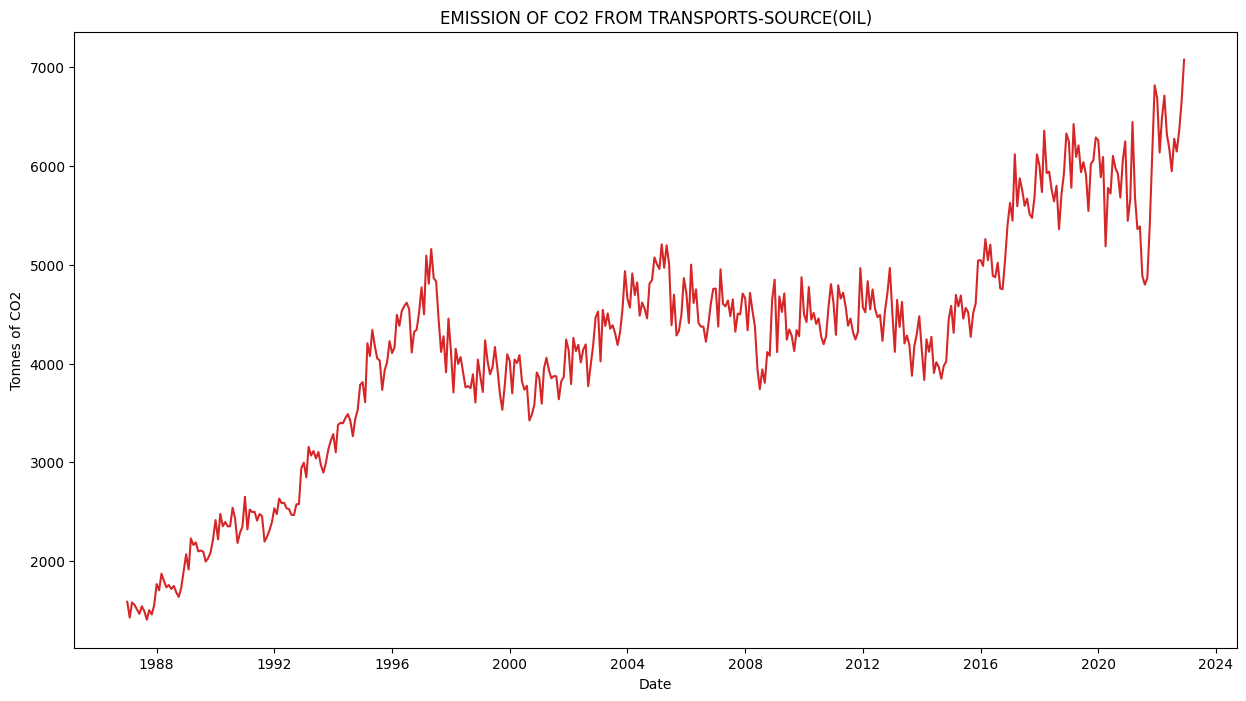

In [ ]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Tonnes of CO2', dpi=100):
    plt.figure(figsize=(15,8), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()


plot_df(transport_oil_data, x=transport_oil_data.index, y=transport_oil_data['emissions_tons'], title='EMISSION OF CO2 FROM TRANSPORTS-SOURCE(OIL)')

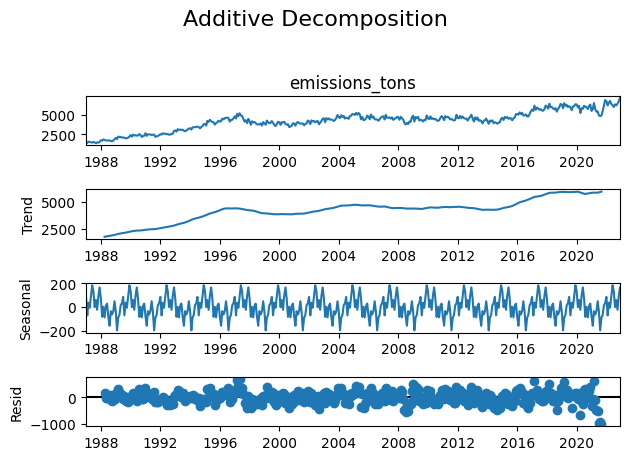

In [ ]:
## DECOMPOSITION OF TIME SERIES:
## CHECKING HOW THE TIME SERIES IS MADE OF

from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


## ADDITIVE

additive_decomposition = seasonal_decompose(transport_oil_data['emissions_tons'], model='additive', period=30)

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()


## MULTIPL

In [ ]:
transport_oil_data.index

DatetimeIndex(['1987-01-01', '1987-02-01', '1987-03-01', '1987-04-01',
               '1987-05-01', '1987-06-01', '1987-07-01', '1987-08-01',
               '1987-09-01', '1987-10-01',
               ...
               '2022-03-01', '2022-04-01', '2022-05-01', '2022-06-01',
               '2022-07-01', '2022-08-01', '2022-09-01', '2022-10-01',
               '2022-11-01', '2022-12-01'],
              dtype='datetime64[ns]', name='date', length=432, freq=None)

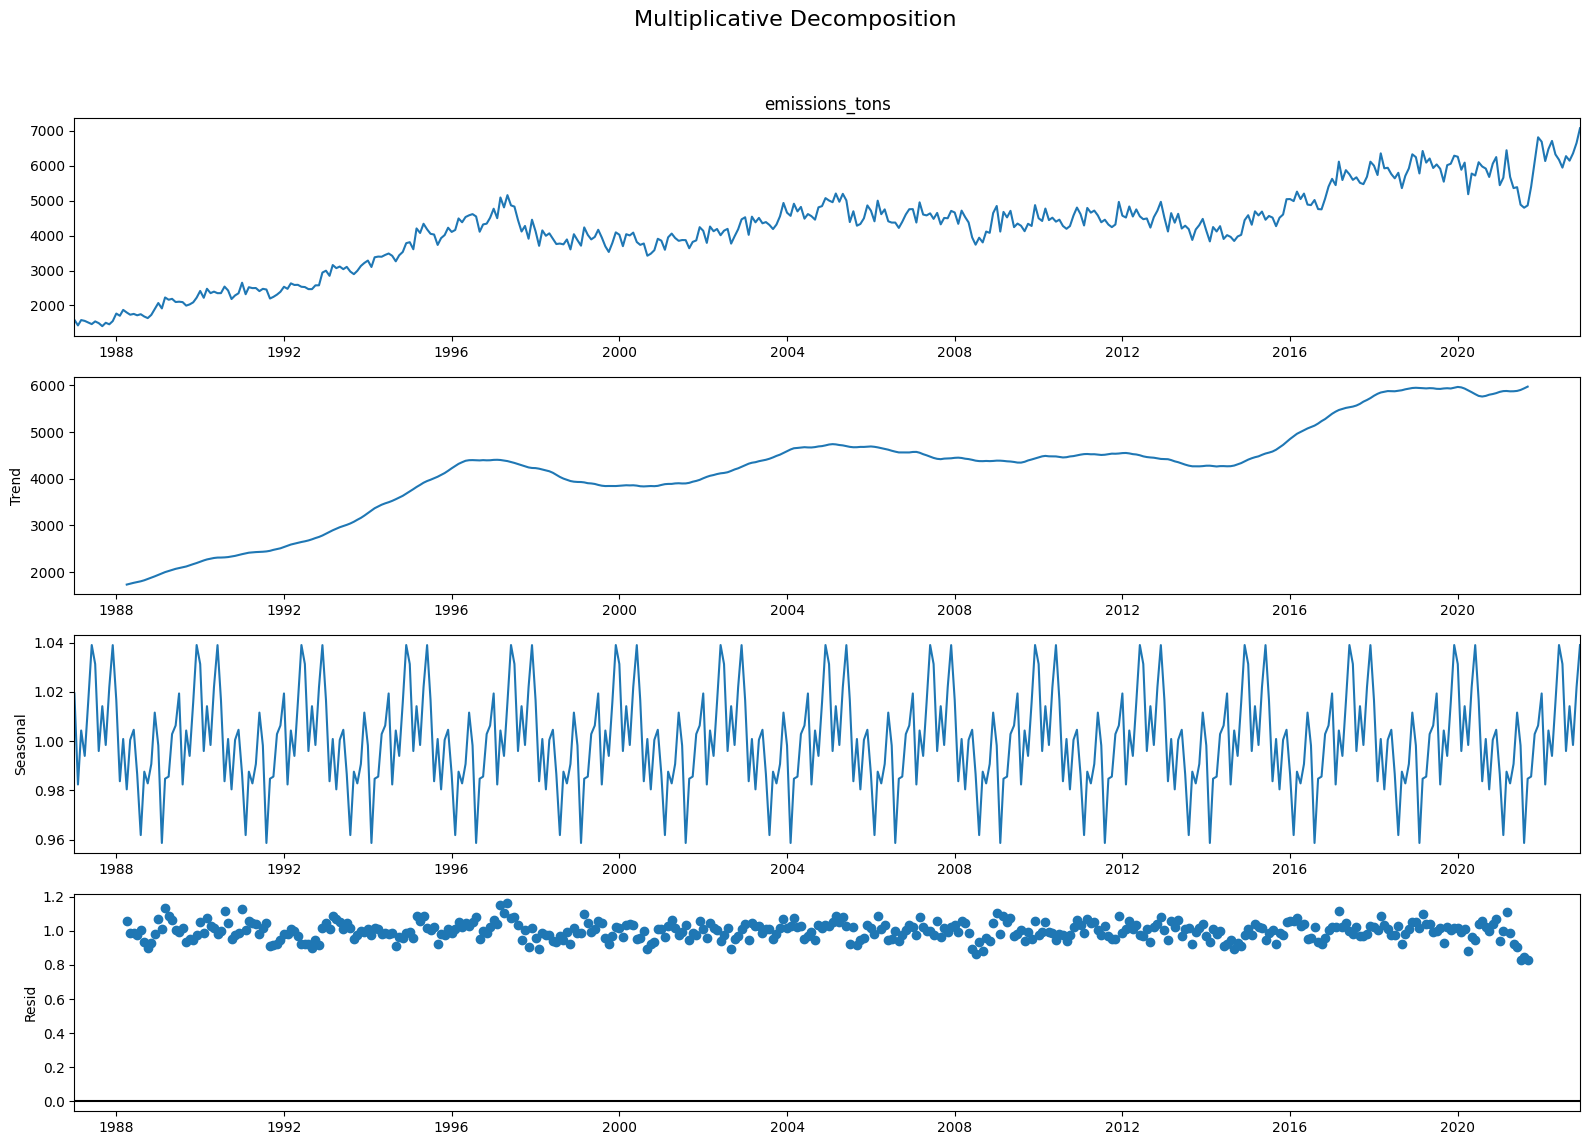

In [ ]:
## MULTIPLICATIVE MODEL:



multiplicative_decomposition = seasonal_decompose(transport_oil_data['emissions_tons'], model='multiplicative', period=30)

plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

If we look at the residuals of the additive decomposition closely, it has some pattern left over.

The multiplicative decomposition, looks quite random which is good. So ideally, multiplicative decomposition should be preferred for this particular series.

### CHECKING FOR STATIONARITY


In [ ]:
from statsmodels.tsa.stattools import adfuller

# Assuming your time series data is stored in a pandas Series called 'series'
result = adfuller(transport_oil_data['emissions_tons'])

# Extract and print the p-value
p_value = result[1]
print("ADF p-value:", p_value)

if  (p_value) > 0.05:
  print("SERIES IS NOT STATIONARY")
else:
  print("SERIES IS STATIONARY")

ADF p-value: 0.6871519432545015
SERIES IS NOT STATIONARY


In [ ]:
## STEPS FOR CONVERTING THE NON STATIONARY TO STATIONARY:


## TAKING THE DIFFERENCING THE SERIES:


transport_oil_data['Differenced'] = transport_oil_data['emissions_tons'].diff().dropna()



In [ ]:
transport_oil_data['Differenced']=transport_oil_data['Differenced'].dropna()

In [ ]:
diff = transport_oil_data['Differenced'].dropna()

In [ ]:
## AFTER DIFFERENCING :
## CHECKING FOR STATIONARY:

from statsmodels.tsa.stattools import adfuller

# Assuming your time series data is stored in a pandas Series called 'series'
result = adfuller(diff)

# Extract and print the p-value
p_value = result[1]
print("ADF p-value:", p_value)

if  (p_value) > 0.05:
  print("SERIES IS NOT STATIONARY")
else:
  print("SERIES IS STATIONARY")



ADF p-value: 0.0029562944166281286
SERIES IS STATIONARY


DATA IS STATIONARY , BUT NEED TO CHECK AGAIN FOR SEASONAL RESIDUALS


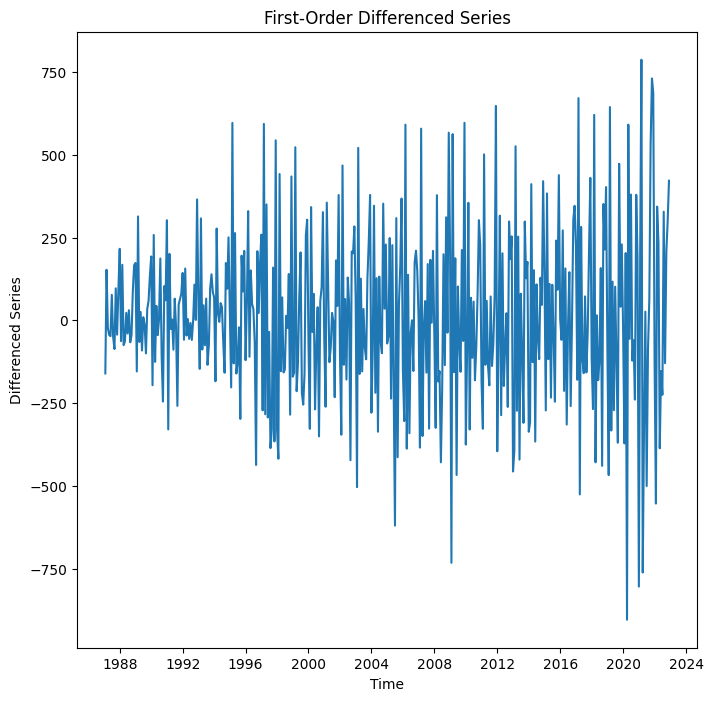

In [ ]:
differenced_series = pd.Series(diff)  # Replace [...] with your actual differenced series

# Plot the differenced series
plt.figure(figsize=(8,8))
plt.plot(differenced_series)
plt.xlabel('Time')
plt.ylabel('Differenced Series')
plt.title('First-Order Differenced Series')
plt.show()

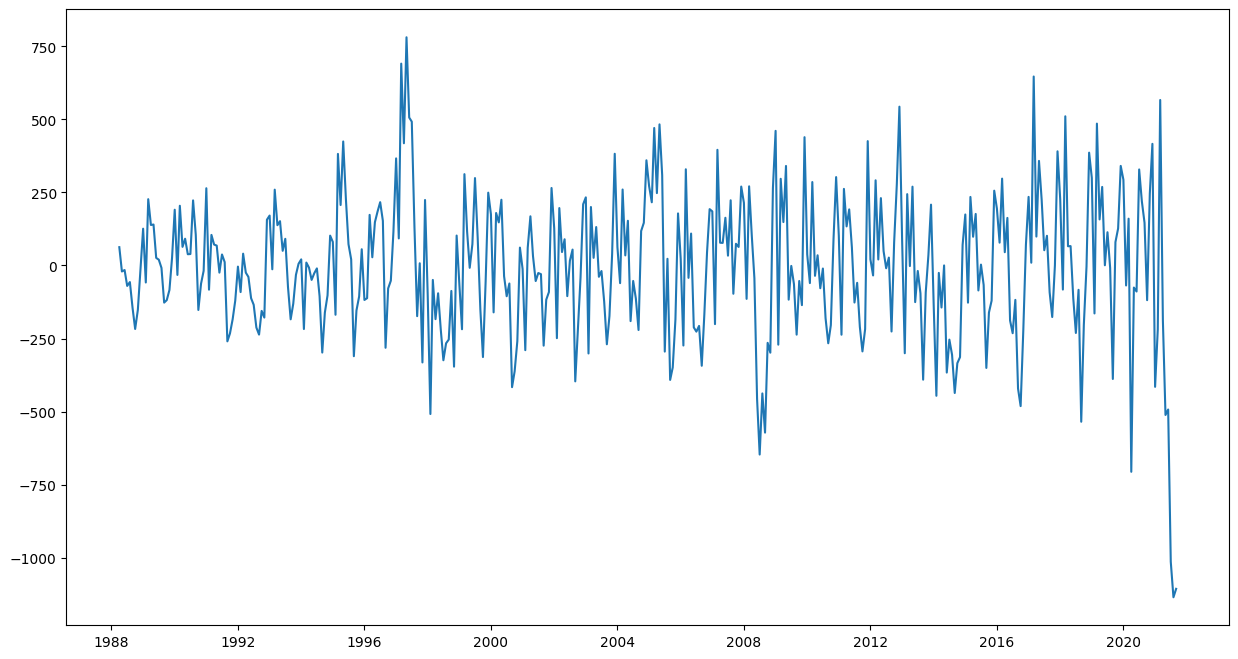

In [ ]:
## USING STATS MODEL:
from statsmodels.tsa.seasonal import seasonal_decompose
result_mul = seasonal_decompose(transport_oil_data['emissions_tons'], model='multiplicative', period=30)
detrended = transport_oil_data['emissions_tons'].values - result_mul.trend
plt.figure(figsize=(15,8))
#plt.subplots_adjust(left=9
#                    , right=10.0, bottom=0.1, top=0.9)
plt.plot(detrended)
#plt.title('Air Passengers detrended by subtracting the trend component', fontsize=16)
#plt.xticks(rotation=45)
#plt.xticks(fontsize=8)



[]

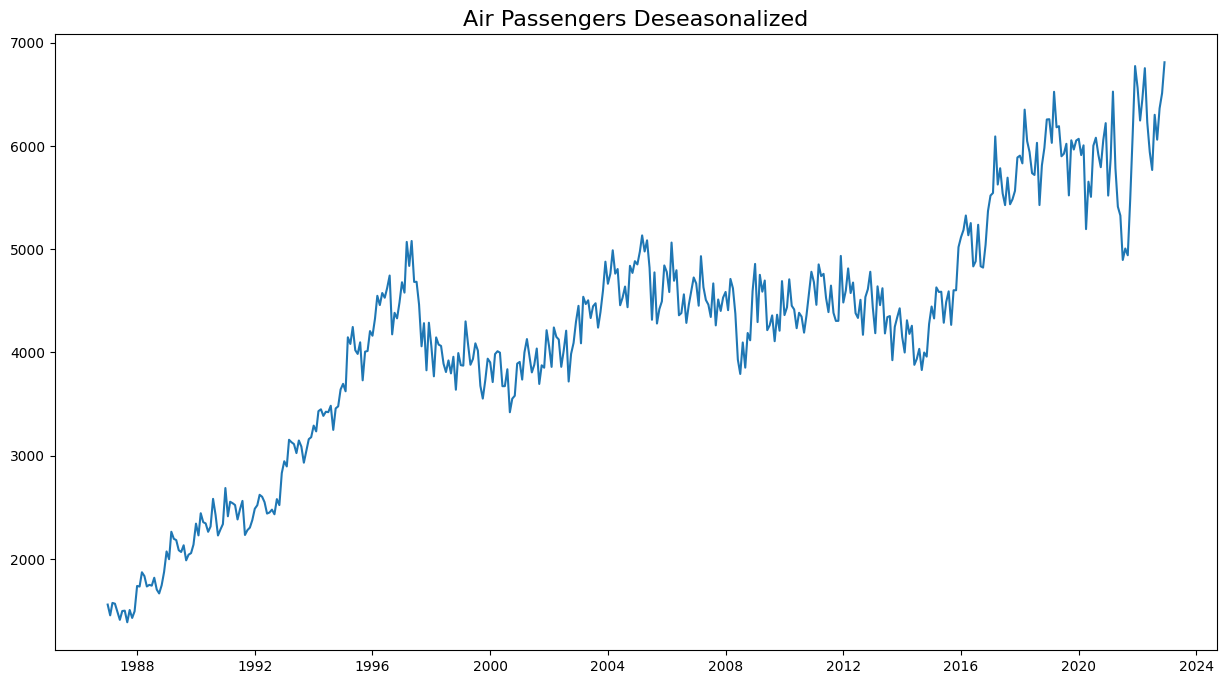

In [ ]:
## STEP 2: => Deseasonalizing the series

# Time Series Decomposition
result_mul = seasonal_decompose(transport_oil_data['emissions_tons'], model='multiplicative', period=30)


# Deseasonalize
deseasonalized = transport_oil_data['emissions_tons'].values / result_mul.seasonal


# Plot
plt.figure(figsize=(15,8))
plt.plot(deseasonalized)

plt.title('Air Passengers Deseasonalized', fontsize=16)
plt.plot()

### FORECASTING


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

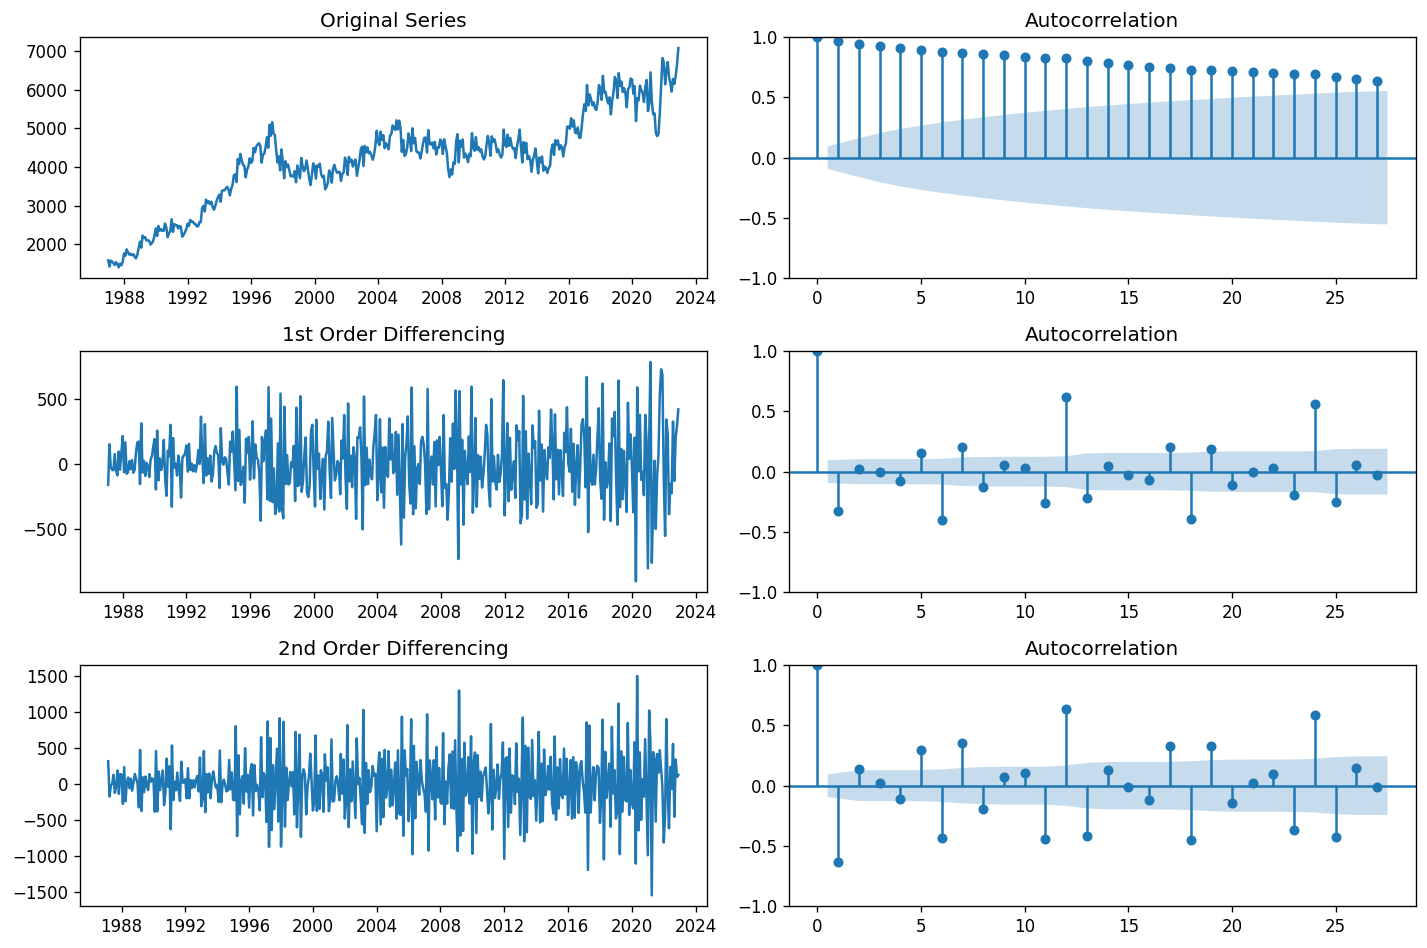

In [ ]:
## IMPLEMENTING THE ARIMA MODEL:

## CALCULATING THE TERMS OF ARIMA:

plt.rcParams.update({'figure.figsize':(12,8), 'figure.dpi':120})


# Original Series
fig, axes = plt.subplots(3, 2, sharex=False)
axes[0, 0].plot(transport_oil_data['emissions_tons']); axes[0, 0].set_title('Original Series')
plot_acf(transport_oil_data['emissions_tons'].values, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(transport_oil_data['emissions_tons'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(transport_oil_data['emissions_tons'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(transport_oil_data['emissions_tons'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(transport_oil_data['emissions_tons'].diff().diff().dropna(), ax=axes[2, 1])

plt.tight_layout()
plt.show()











/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


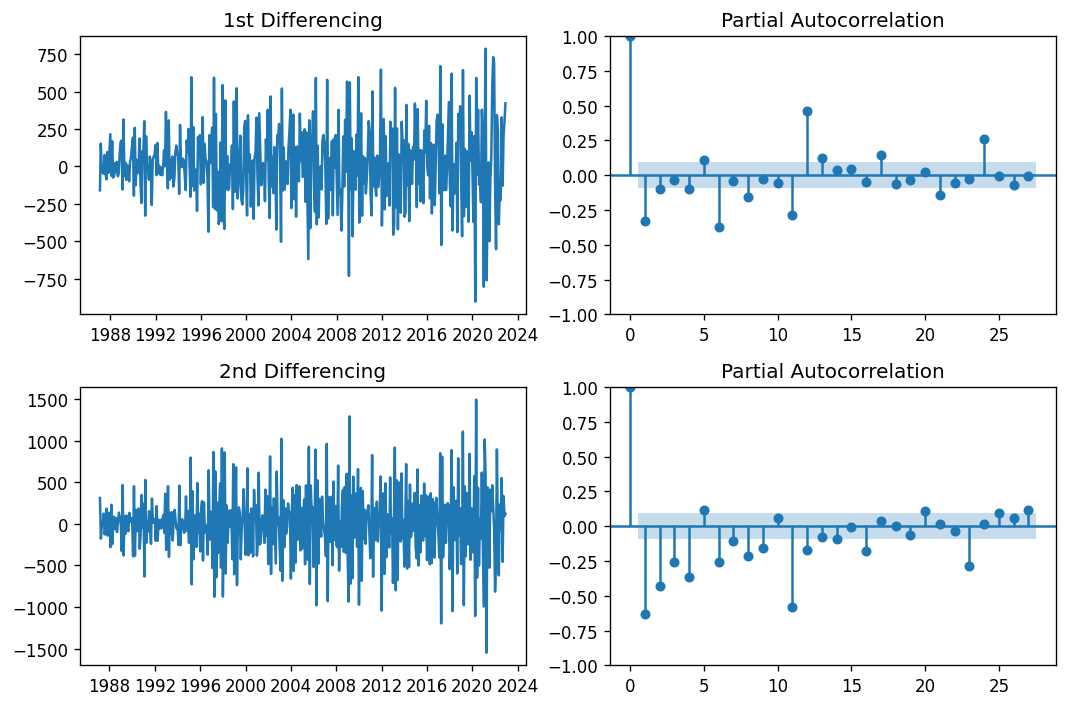

In [ ]:
##FOR IMPLEMENTING ARIMA MODEL

plt.rcParams.update({'figure.figsize':(9,6), 'figure.dpi':120})

fig, axes = plt.subplots(2, 2, sharex=False)

# PACF plot of 1st differenced series
axes[0,0].plot(transport_oil_data['emissions_tons'].diff()); axes[0,0].set_title('1st Differencing')
axes[0,1].set(ylim=(0,5))
plot_pacf(transport_oil_data['emissions_tons'].diff().dropna(), ax=axes[0,1])

# PACF plot of 2nd differenced series
axes[1,0].plot(transport_oil_data['emissions_tons'].diff().diff()); axes[1,0].set_title('2nd Differencing')
axes[1,1].set(ylim=(0,5))
plot_pacf(transport_oil_data['emissions_tons'].diff().diff().dropna(), ax=axes[1,1])
plt.tight_layout()
plt.show()

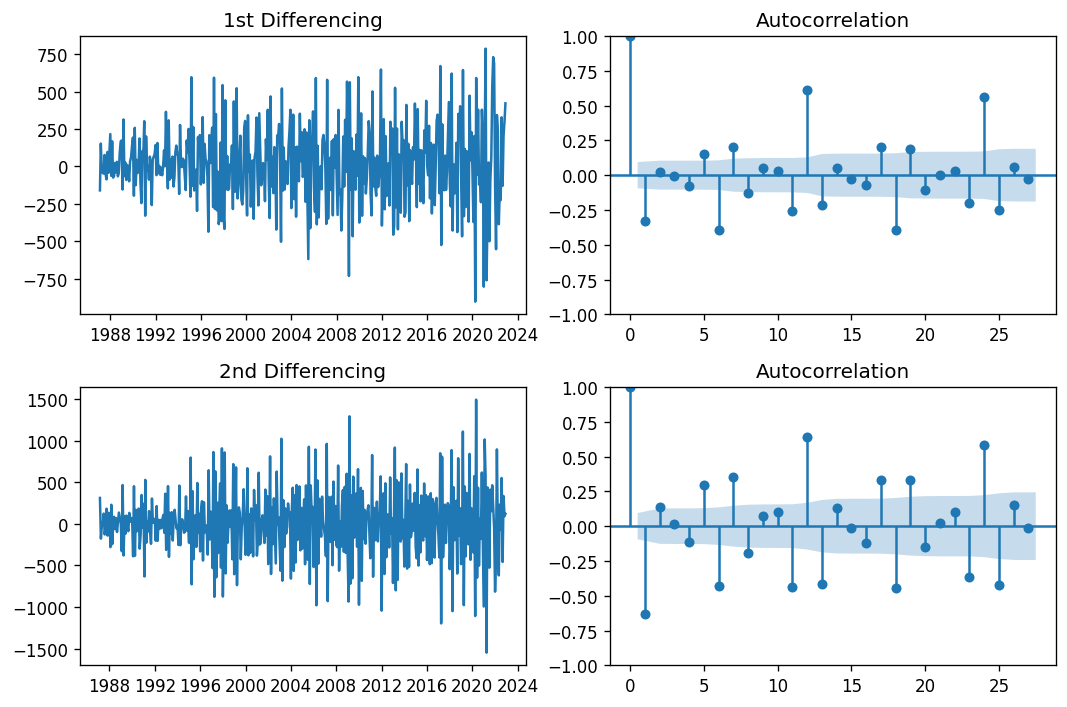

In [ ]:
plt.rcParams.update({'figure.figsize':(9,6), 'figure.dpi':120})

fig, axes = plt.subplots(2, 2, sharex=False)

# ACF plot of 1st differenced series
axes[0,0].plot(transport_oil_data['emissions_tons'].diff()); axes[0,0].set_title('1st Differencing')
axes[0,1].set(ylim=(0,5))
plot_acf(transport_oil_data['emissions_tons'].diff().dropna(), ax=axes[0,1])

# ACF plot of 2nd differenced series
axes[1,0].plot(transport_oil_data['emissions_tons'].diff().diff()); axes[1,0].set_title('2nd Differencing')
axes[1,1].set(ylim=(0,5))
plot_acf(transport_oil_data['emissions_tons'].diff().diff().dropna(), ax=axes[1,1])
plt.tight_layout()
plt.show()

In [ ]:
!pip install pmdarima


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 30.4 MB/s eta 0:00:00


In [ ]:
# After install pmdarima, import auto_arima to train model

#pip install pmdarima
from pmdarima.arima import auto_arima

# Tunning parameters, and specified number of ARIMA models to be fit is 50

arima_model=auto_arima(transport_oil_data['emissions_tons'],start_p=1,d=1,start_q=1,
                       max_p=5,max_q=5,max_d=5,m=12,
                       start_P=0,D=1,start_Q=0,max_P=5,max_D=5,max_Q=5,
                       seasonal=True,
                       trace=True,
                       error_action="ignore",
                       suppress_warnings=True,
                       stepwise=True,n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=5711.735, Time=0.38 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=5741.852, Time=0.08 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=5609.358, Time=0.47 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=5510.683, Time=1.44 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=5712.824, Time=0.11 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=5512.683, Time=2.49 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=5512.683, Time=6.65 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=5602.415, Time=0.94 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=9.65 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=5541.322, Time=1.95 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=5512.074, Time=2.97 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=5512.166, Time=3.32 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=5515.097, Time=2.77 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=inf, Time=10.17 sec
 ARIMA(0,1,1)(0,1,1)[12] int

In [ ]:
arima_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  432
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -2752.341
Date:                            Fri, 16 Jun 2023   AIC                           5510.683
Time:                                    10:52:50   BIC                           5522.797
Sample:                                01-01-1987   HQIC                          5515.471
                                     - 12-01-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2948      0.033     -8.982      0.000      -0.359      -0.230
ma.S.L12      -0.8353      0.026    -32.061      0.000      -0.886      -0.784
sigma2      2.873e+04   1378.461     20.842      0.000     2.6e+04    3.14e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               176.68
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               2.83   Skew:                            -0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
size=int(len(transport_oil_data['emissions_tons'])*0.66)
X_train,X_test=transport_oil_data['emissions_tons'][0:size],transport_oil_data['emissions_tons'][size:len(transport_oil_data['emissions_tons'])]

In [ ]:
X_train.shape


(285,)

In [ ]:
X_test.shape


(147,)

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [ ]:
model=SARIMAX(transport_oil_data['emissions_tons'],
             order=(0,1,1),
             seasonal_order=(2,1,1,12))
result=model.fit()
result.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                     emissions_tons   No. Observations:                  432
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood               -2751.967
Date:                            Fri, 16 Jun 2023   AIC                           5513.933
Time:                                    10:52:59   BIC                           5534.122
Sample:                                01-01-1987   HQIC                          5521.914
                                     - 12-01-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2905      0.034     -8.636      0.000      -0.356      -0.225
ar.S.L12      -0.0191      0.062     -0.308      0.758      -0.141       0.103
ar.S.L24      -0.0574      0.063     -0.913      0.361      -0.181       0.066
ma.S.L12      -0.8166      0.048    -16.851      0.000      -0.912      -0.722
sigma2      2.867e+04   1392.897     20.582      0.000    2.59e+04    3.14e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               170.54
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               2.78   Skew:                            -0.34
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
start_index=0
end_index=len(X_train)-1
train_predction=result.predict(start_index,end_index)
train_predction

1987-01-01       0.000000
1987-02-01    1577.637365
1987-03-01    1430.301441
1987-04-01    1579.128026
1987-05-01    1557.692663
                 ...     
2010-05-01    4562.739471
2010-06-01    4297.737918
2010-07-01    4304.352429
2010-08-01    4451.547111
2010-09-01    4104.402459
Freq: MS, Name: predicted_mean, Length: 285, dtype: float64

In [ ]:
st_index=len(X_train)
ed_index=len(transport_oil_data['emissions_tons'])-1
predction=result.predict(st_index,ed_index)
predction

2010-10-01    4346.126413
2010-11-01    4349.395450
2010-12-01    4862.701174
2011-01-01    4731.195311
2011-02-01    4365.428323
                 ...     
2022-08-01    5987.589152
2022-09-01    5997.355403
2022-10-01    6327.831495
2022-11-01    6606.201744
2022-12-01    7033.459330
Freq: MS, Name: predicted_mean, Length: 147, dtype: float64

In [ ]:
X_test.index = predction.index

<Axes: >

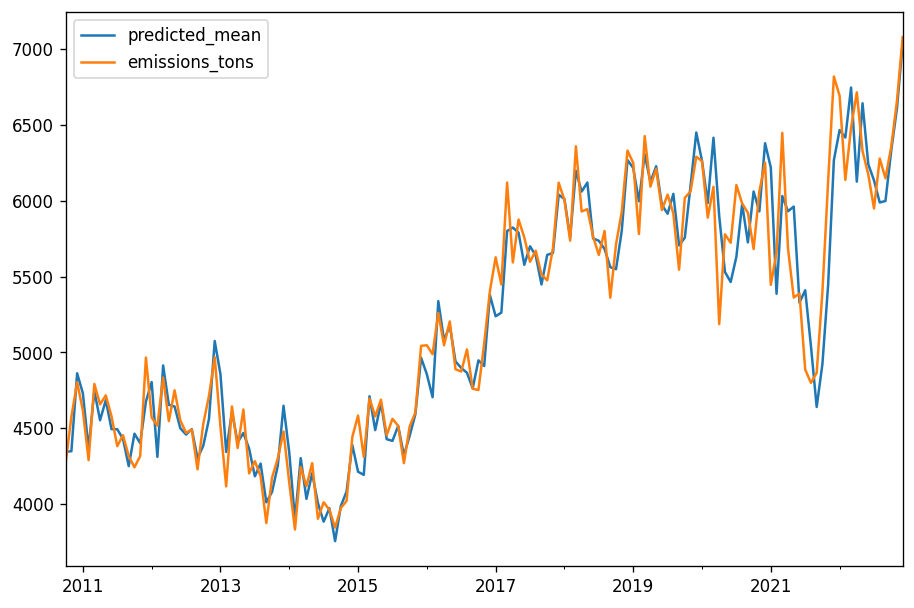

In [ ]:
predction.plot(legend=True)
X_test.plot(legend=True)


In [ ]:
import math
from sklearn.metrics import mean_squared_error

In [ ]:
trainScore=math.sqrt(mean_squared_error(X_train,train_predction))
testScore=math.sqrt(mean_squared_error(X_test,predction))
trainScore,testScore

(171.08234221070873, 213.55745061469455)

In [ ]:
forcast=result.predict(start=len(transport_oil_data['emissions_tons']),
                      end=(len(transport_oil_data['emissions_tons'])-1)+3*12,
                      typ="levels").rename('Forecust')

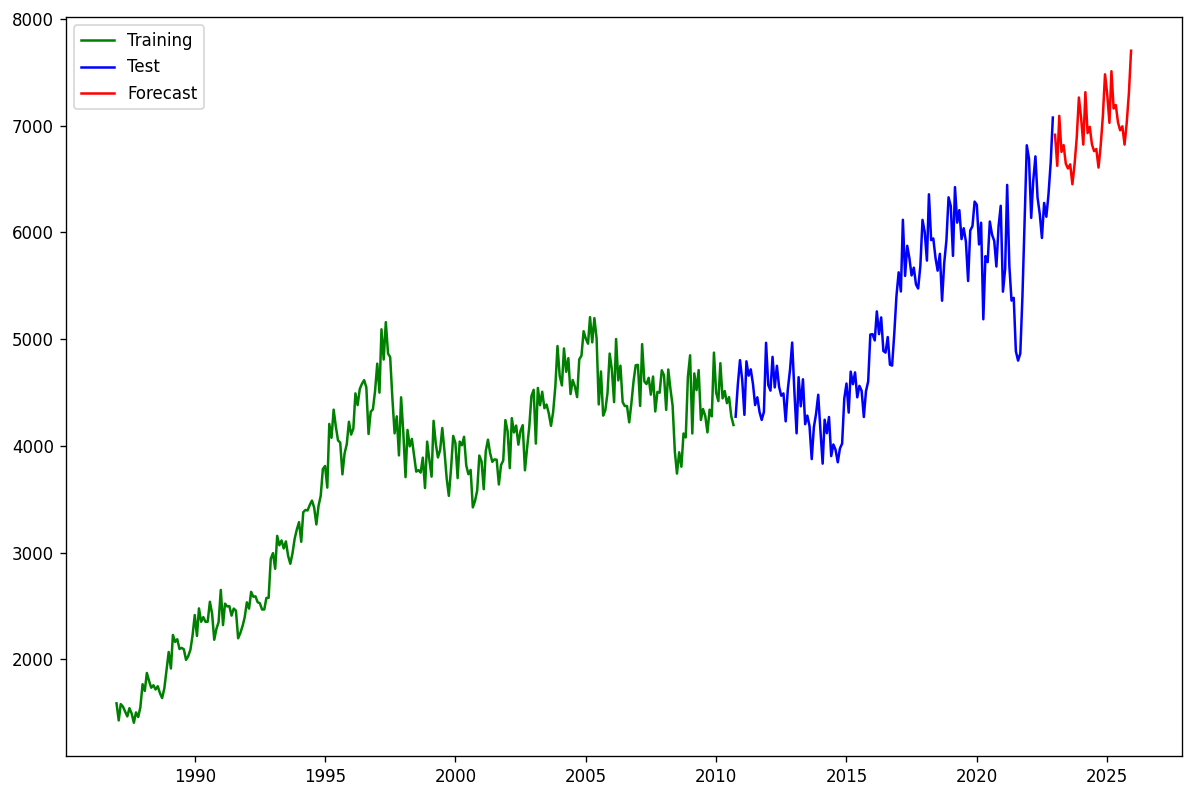

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(X_train,label="Training",color='green')
plt.plot(X_test,label="Test",color='blue')
plt.plot(forcast,label="Forecast",color="red")
plt.legend(loc="upper left")

In [ ]:
print(X_train.index)
print(predction.index)

DatetimeIndex(['1987-01-01', '1987-02-01', '1987-03-01', '1987-04-01',
               '1987-05-01', '1987-06-01', '1987-07-01', '1987-08-01',
               '1987-09-01', '1987-10-01',
               ...
               '2009-12-01', '2010-01-01', '2010-02-01', '2010-03-01',
               '2010-04-01', '2010-05-01', '2010-06-01', '2010-07-01',
               '2010-08-01', '2010-09-01'],
              dtype='datetime64[ns]', name='date', length=285, freq=None)
DatetimeIndex(['2010-10-01', '2010-11-01', '2010-12-01', '2011-01-01',
               '2011-02-01', '2011-03-01', '2011-04-01', '2011-05-01',
               '2011-06-01', '2011-07-01',
               ...
               '2022-03-01', '2022-04-01', '2022-05-01', '2022-06-01',
               '2022-07-01', '2022-08-01', '2022-09-01', '2022-10-01',
               '2022-11-01', '2022-12-01'],
              dtype='datetime64[ns]', length=147, freq='MS')


In [ ]:
print("FORECASTED VALUES:")
print(forcast)

FORECASTED VALUES:
2023-01-01    6915.027281
2023-02-01    6623.888435
2023-03-01    7092.253441
2023-04-01    6754.878431
2023-05-01    6818.409204
2023-06-01    6643.626185
2023-07-01    6599.182603
2023-08-01    6637.903439
2023-09-01    6451.272650
2023-10-01    6634.290473
2023-11-01    6889.522170
2023-12-01    7264.365621
2024-01-01    7075.069904
2024-02-01    6822.869867
2024-03-01    7314.318805
2024-04-01    6930.779314
2024-05-01    6989.418873
2024-06-01    6825.339149
2024-07-01    6761.640394
2024-08-01    6782.026183
2024-09-01    6607.700423
2024-10-01    6809.816495
2024-11-01    7090.616435
2024-12-01    7481.627830
2025-01-01    7294.839133
2025-02-01    7026.839966
2025-03-01    7510.698679
2025-04-01    7160.737582
2025-05-01    7193.657192
2025-06-01    7030.610628
2025-07-01    6956.930630
2025-08-01    6994.280689
2025-09-01    6823.004579
2025-10-01    7026.130637
2025-11-01    7309.026588
2025-12-01    7702.428593
Freq: MS, Name: Forecust, dtype: float64


### INDUSTRY:

In [ ]:
## FORECASTING THE INDUSTRY - OIL EMISSIONS:




industry_oil_data = industry_data.loc[industry_data['fuel_type'] == 'oil']
industry_oil_data = industry_oil_data.drop(['source','fuel_type'],axis=1)

industry_oil_data

year  month  emissions_tons
432  1987      1          531.26
433  1987      2          408.65
434  1987      3          444.82
435  1987      4          433.29
436  1987      5          495.61
..    ...    ...             ...
859  2022      8         1041.70
860  2022      9          996.27
861  2022     10         1053.18
862  2022     11         1075.07
863  2022     12         1126.34

[432 rows x 3 columns]

In [ ]:
industry_oil_data_2 = industry_oil_data.copy()


In [ ]:
# import matplotlib.cm as cm

# industry_oil_data_2['Month'] = industry_oil_data_2.index.month
# industry_oil_data_2['Year'] = industry_oil_data_2.index.year

# # Get unique years
# years = industry_oil_data_2['Year'].unique()

# # Create a colormap for the years
# colors = cm.rainbow_r([i / len(years) for i in range(len(years))])

# fig, ax = plt.subplots()

# for year, color in zip(years, colors):
#     data = industry_oil_data_2[industry_oil_data_2['Year'] == year]
#     ax.plot(data['Month'], data['emissions_tons'], label=str(year), color=color, marker='o')

# ax.set_xlabel('Month')
# ax.set_ylabel('Number of Passengers')
# ax.set_title('Passenger Count vs Month')
# ax.legend(title='Year')
# plt.show()



In [ ]:
industry_oil_data['date'] = date_month
industry_oil_data["date"]=pd.to_datetime(industry_oil_data["date"])
industry_oil_data.set_index("date",inplace=True)
industry_oil_data

year  month  emissions_tons
date                                   
1987-01-01  1987      1          531.26
1987-02-01  1987      2          408.65
1987-03-01  1987      3          444.82
1987-04-01  1987      4          433.29
1987-05-01  1987      5          495.61
...          ...    ...             ...
2022-08-01  2022      8         1041.70
2022-09-01  2022      9          996.27
2022-10-01  2022     10         1053.18
2022-11-01  2022     11         1075.07
2022-12-01  2022     12         1126.34

[432 rows x 3 columns]

In [ ]:
print(industry_oil_data.columns)
industry_oil_data = industry_oil_data.drop(['year','month'],axis=1)

Index(['year', 'month', 'emissions_tons'], dtype='object')


In [ ]:
industry_oil_data.head(5)

emissions_tons
date                      
1987-01-01          531.26
1987-02-01          408.65
1987-03-01          444.82
1987-04-01          433.29
1987-05-01          495.61

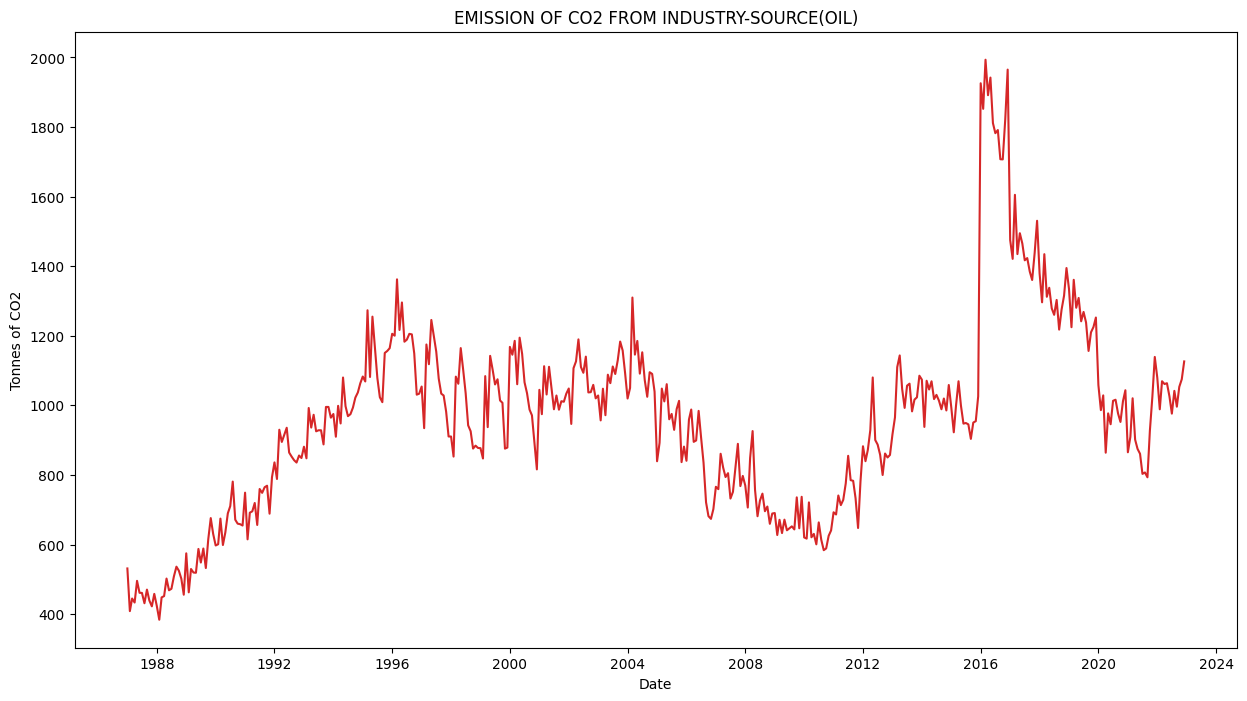

In [ ]:
### Visualizing the series:


def plot_df(df, x, y, title="", xlabel='Date', ylabel='Tonnes of CO2', dpi=100):
    plt.figure(figsize=(15,8), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()


plot_df(industry_oil_data, x=industry_oil_data.index, y=industry_oil_data['emissions_tons'], title='EMISSION OF CO2 FROM INDUSTRY-SOURCE(OIL)')





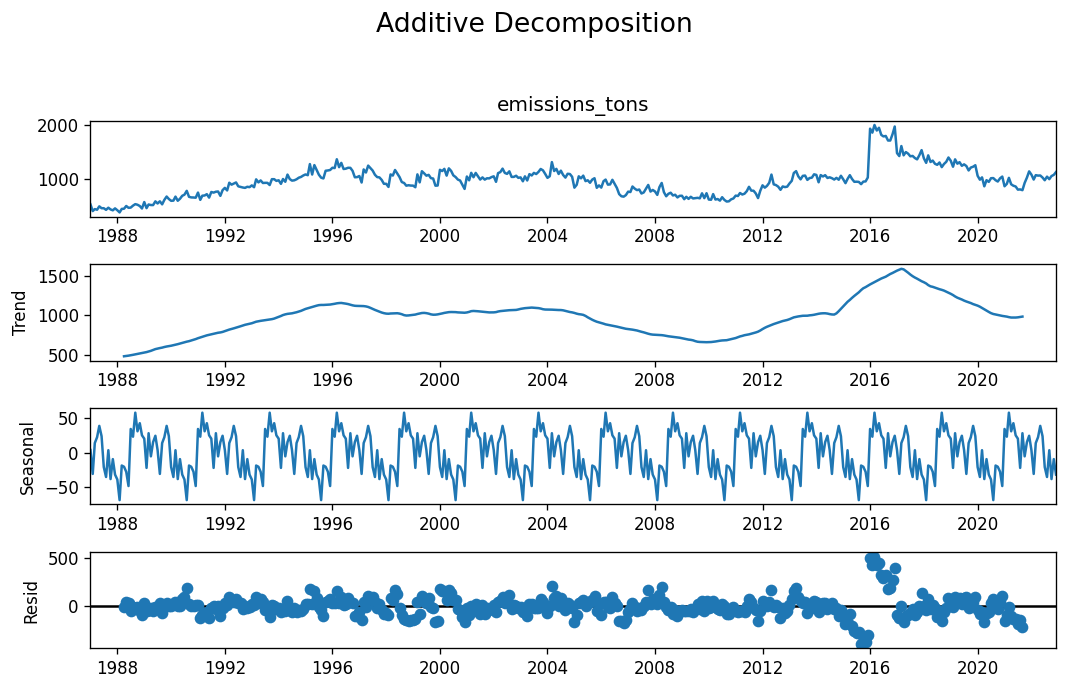

In [ ]:
## DECOMPOSITION OF TIME SERIES:
## CHECKING HOW THE TIME SERIES IS MADE OF

from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


## ADDITIVE

additive_decomposition = seasonal_decompose(industry_oil_data['emissions_tons'], model='additive', period=30)

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()


## MULTIPL

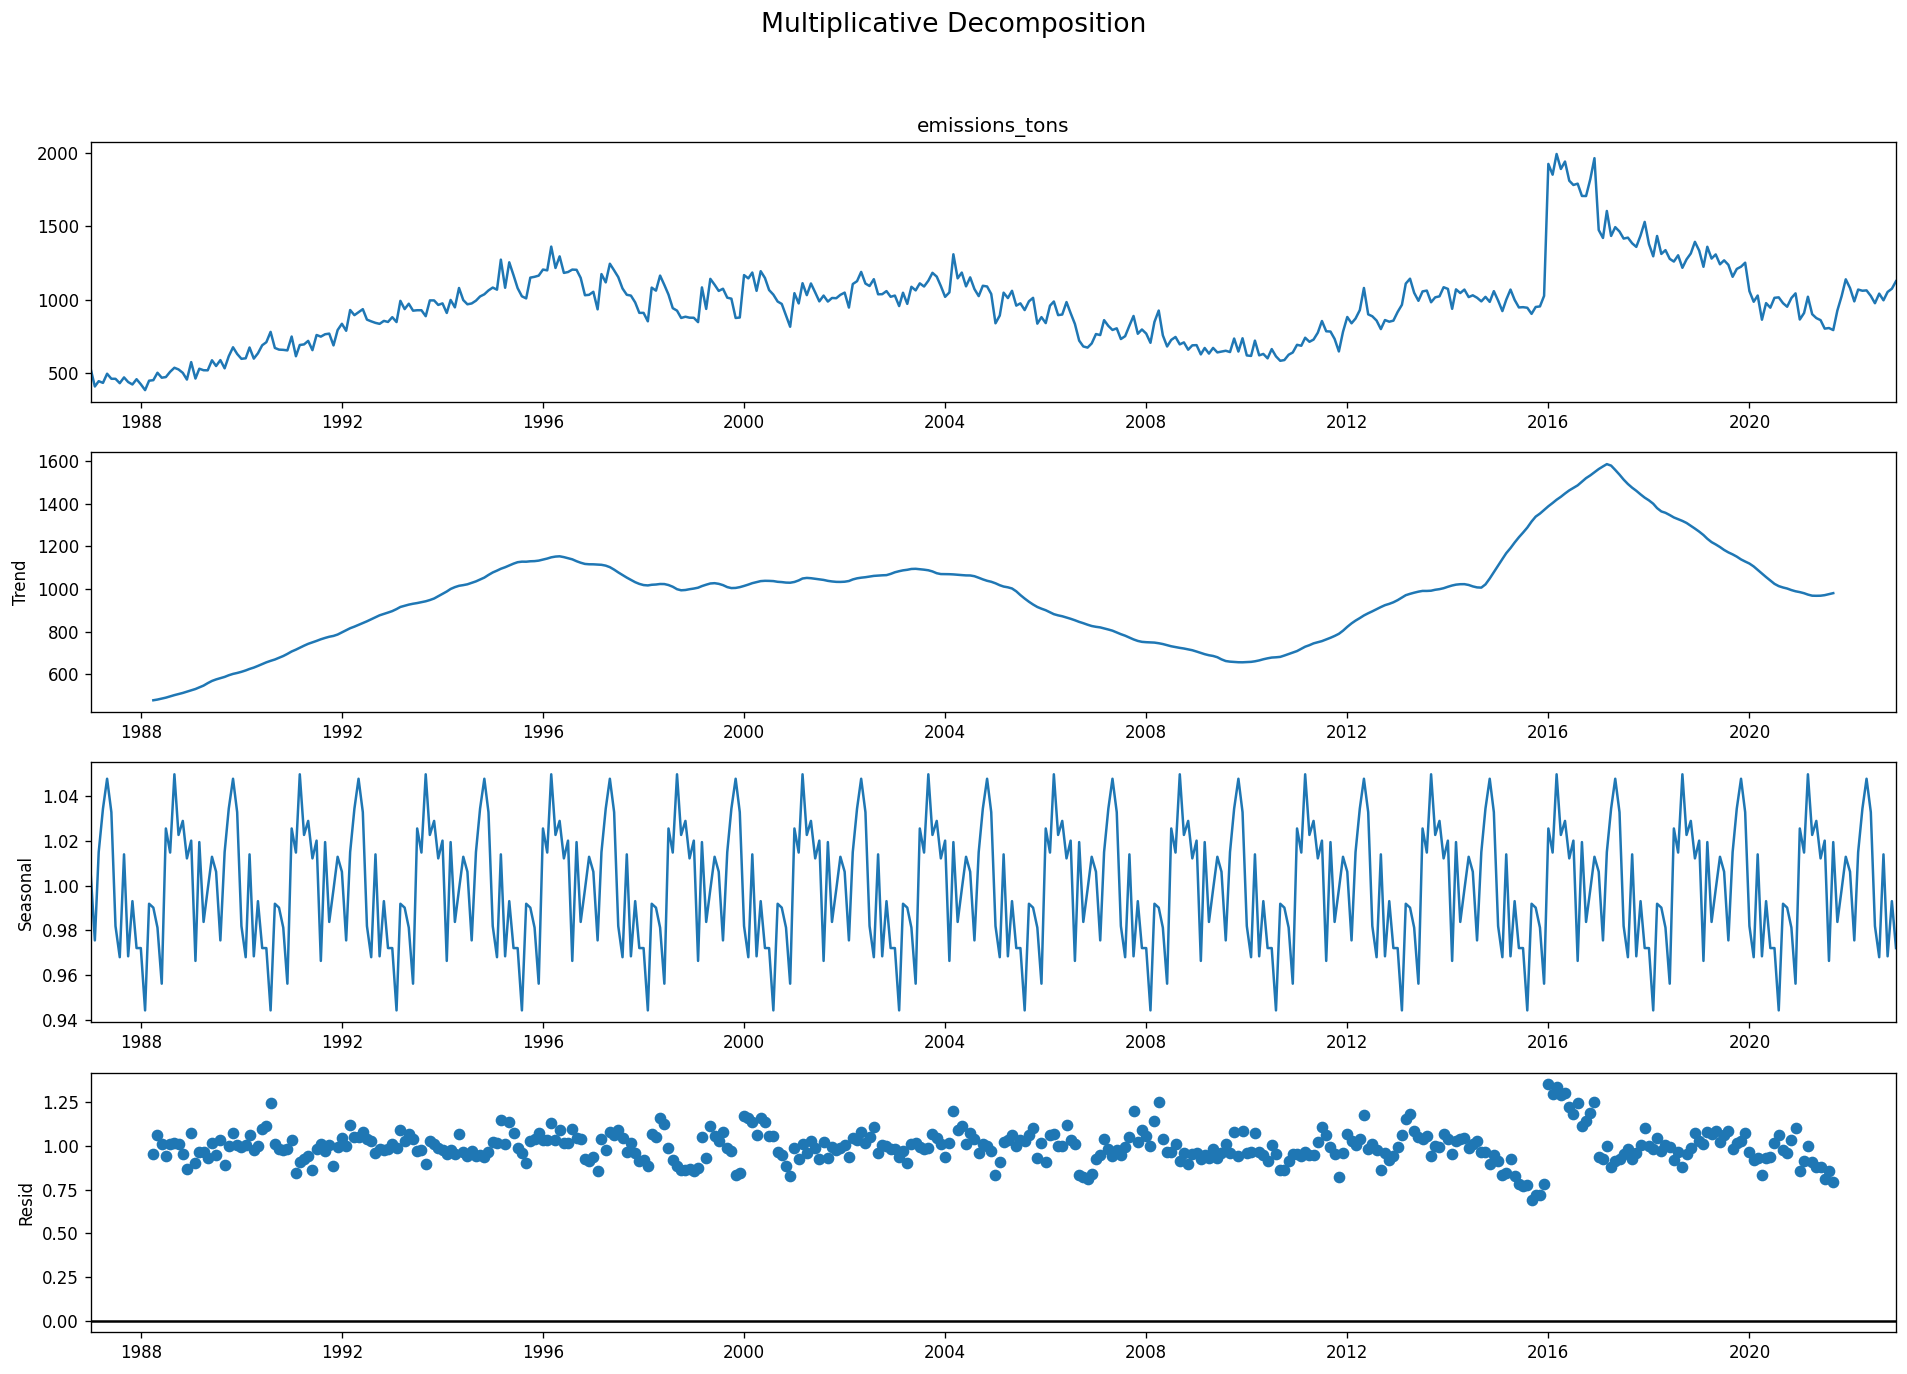

In [ ]:
## MULTIPLICATIVE MODEL:



multiplicative_decomposition = seasonal_decompose(industry_oil_data['emissions_tons'], model='multiplicative', period=30)

plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

If we look at the residuals of the additive decomposition closely, it has some pattern left over.

The multiplicative decomposition, looks quite random which is good. So ideally, multiplicative decomposition should be preferred for this particular series.

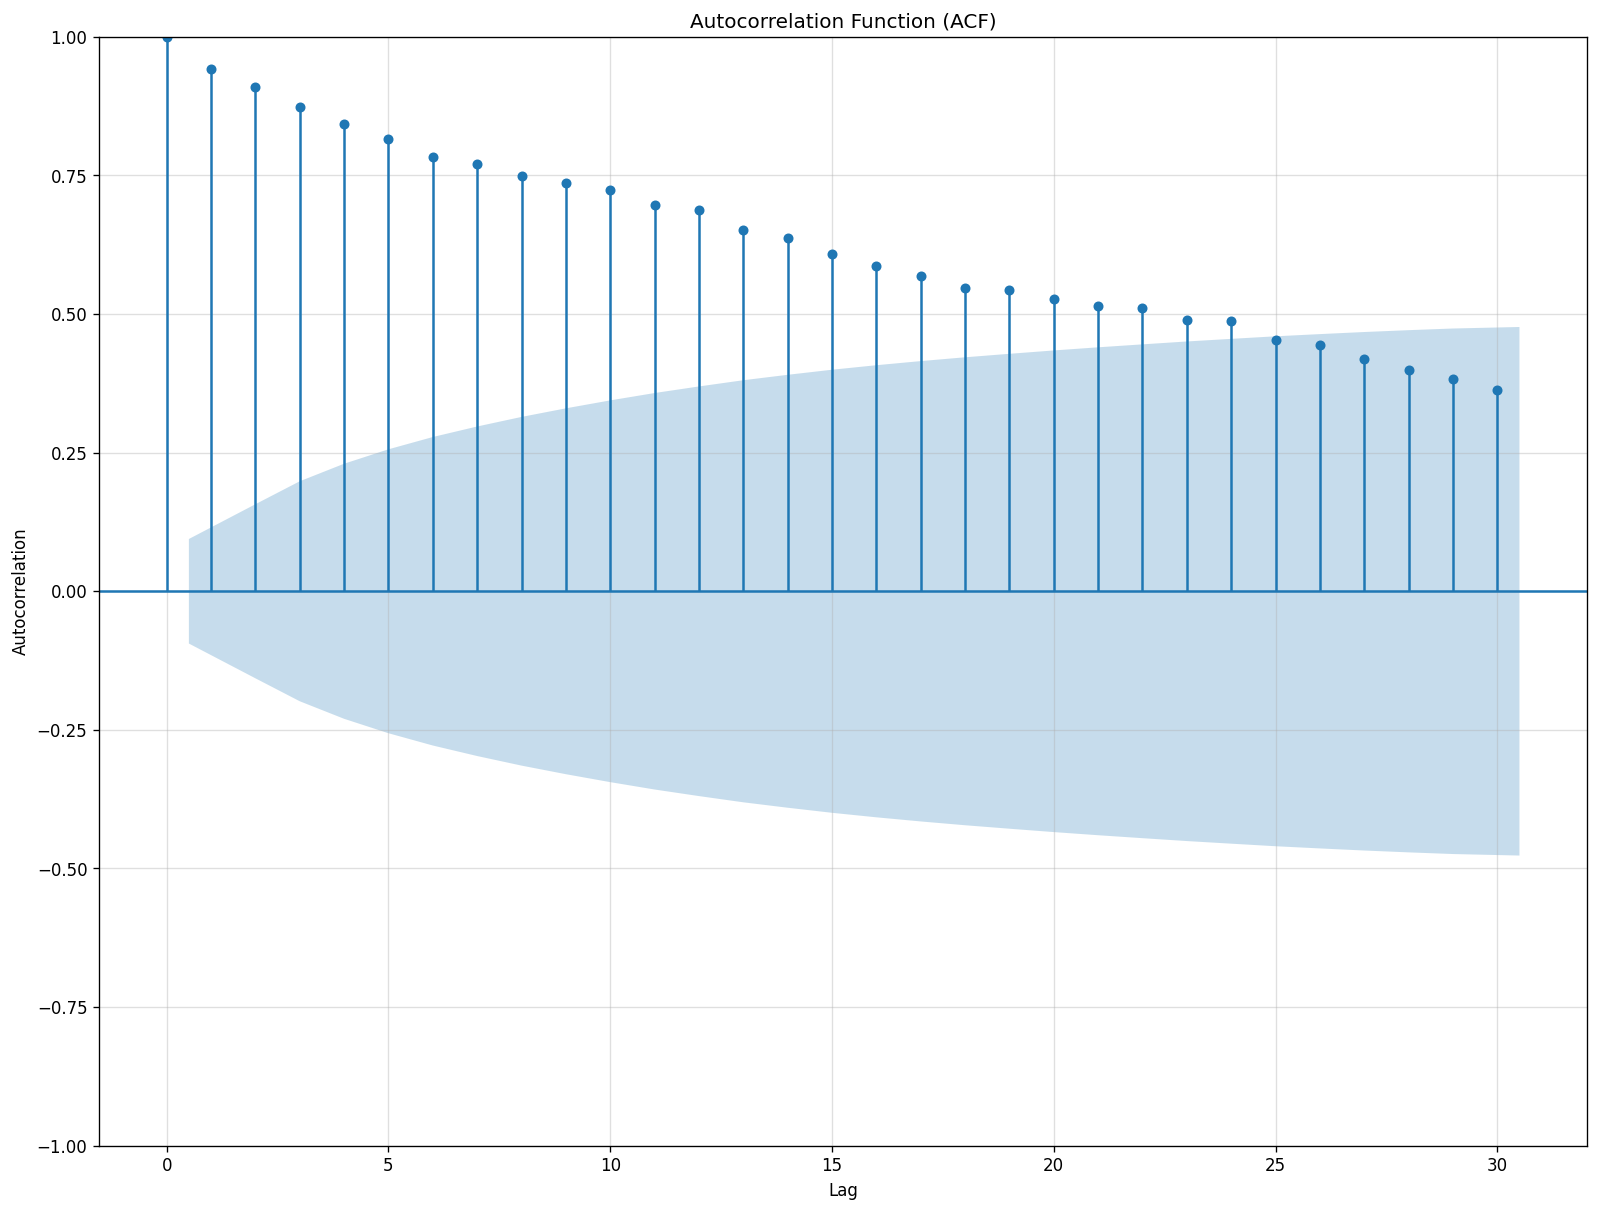

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Assuming you have a DataFrame 'df' with a time series column named 'Data'
data = industry_oil_data['emissions_tons']

# Plot the ACF
plot_acf(data, lags=30)

plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.grid(alpha = 0.4)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Assuming your time series data is stored in a pandas Series called 'series'
result = adfuller(industry_oil_data['emissions_tons'])

# Extract and print the p-value
p_value = result[1]
print("ADF p-value:", p_value)

if  (p_value) > 0.05:
  print("SERIES IS NOT STATIONARY")
else:
  print("SERIES IS STATIONARY")

ADF p-value: 0.07353591325773931
SERIES IS NOT STATIONARY


In [ ]:
## STEPS FOR CONVERTING THE NON STATIONARY TO STATIONARY:


## TAKING THE DIFFERENCING THE SERIES:


industry_oil_data['Differenced'] = industry_oil_data['emissions_tons'].diff().dropna()



In [ ]:
industry_oil_data['Differenced']=industry_oil_data['Differenced'].dropna()

In [ ]:
diff_2 = industry_oil_data['Differenced'].dropna()

In [ ]:
## AFTER DIFFERENCING :
## CHECKING FOR STATIONARY:

from statsmodels.tsa.stattools import adfuller

# Assuming your time series data is stored in a pandas Series called 'series'
result = adfuller(diff_2)

# Extract and print the p-value
p_value = result[1]
print("ADF p-value:", p_value)

if  (p_value) > 0.05:
  print("SERIES IS NOT STATIONARY")
else:
  print("SERIES IS STATIONARY")



ADF p-value: 5.973620055690863e-07
SERIES IS STATIONARY


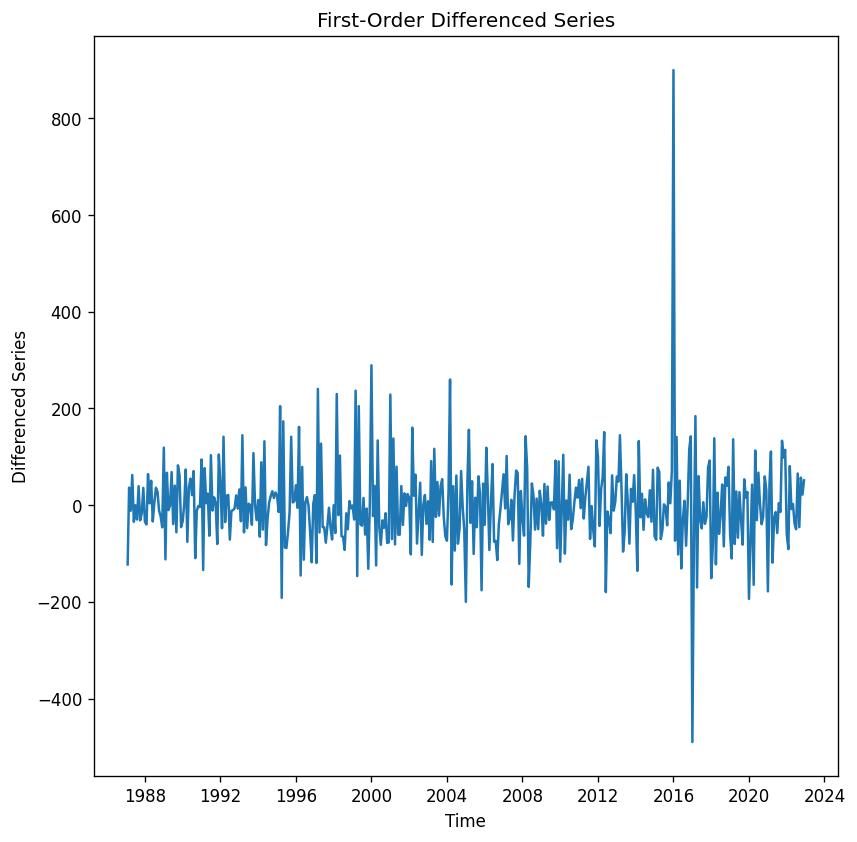

In [ ]:
## VISUALIZING THE DIFFERENCED SERIES:

differenced_series = pd.Series(diff_2)  # Replace [...] with your actual differenced series

# Plot the differenced series
plt.figure(figsize=(8,8))
plt.plot(differenced_series)
plt.xlabel('Time')
plt.ylabel('Differenced Series')
plt.title('First-Order Differenced Series')
plt.show()












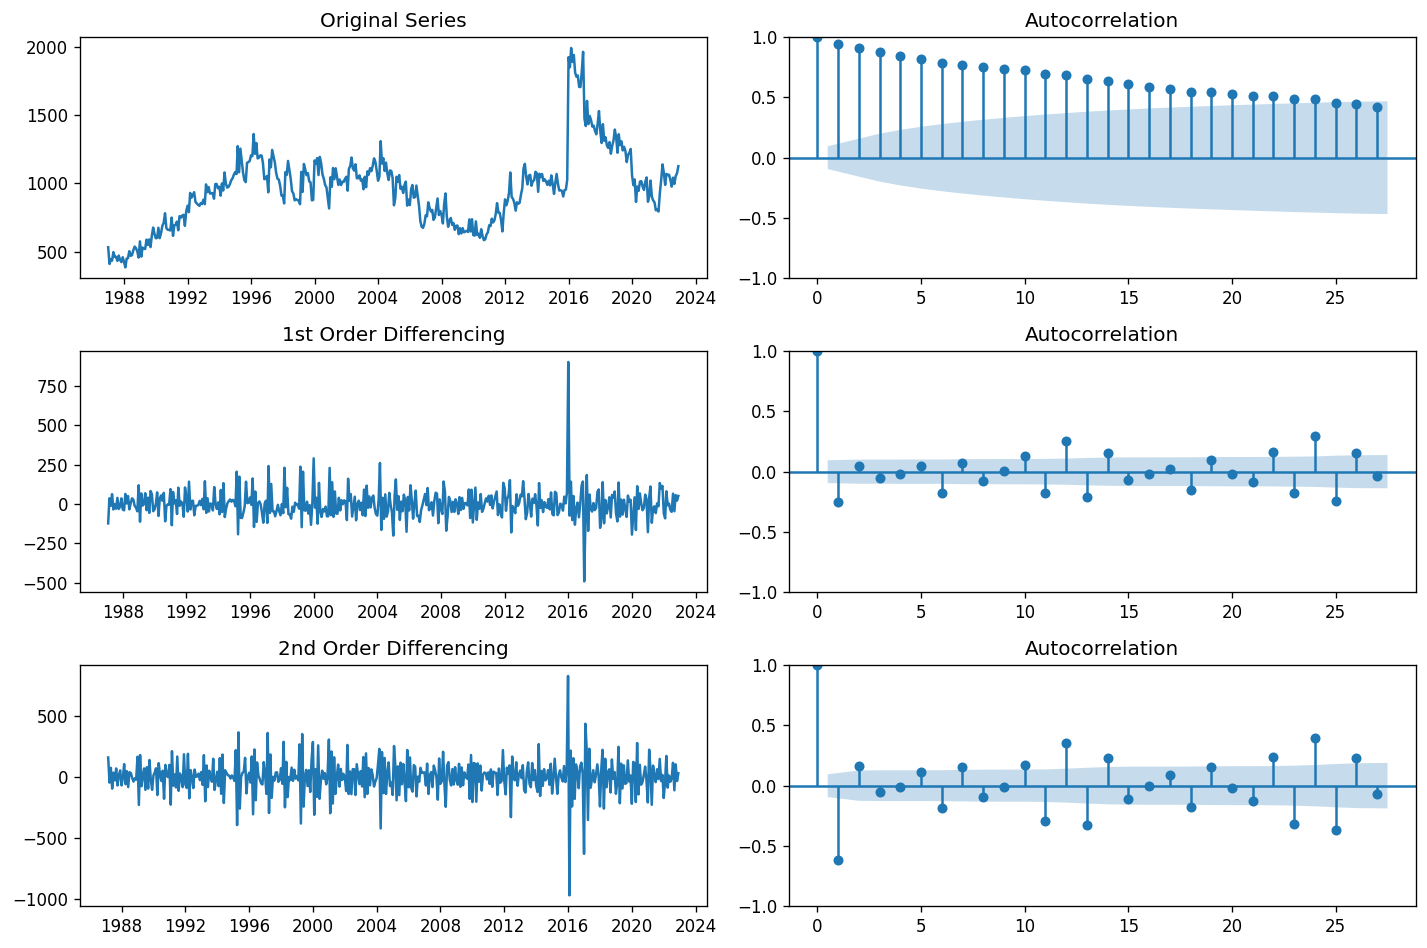

In [ ]:
## IMPLEMENTING THE ARIMA MODEL:

## CALCULATING THE TERMS OF ARIMA:

plt.rcParams.update({'figure.figsize':(12,8), 'figure.dpi':120})


# Original Series
fig, axes = plt.subplots(3, 2, sharex=False)
axes[0, 0].plot(industry_oil_data['emissions_tons']); axes[0, 0].set_title('Original Series')
plot_acf(industry_oil_data['emissions_tons'].values, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(industry_oil_data['emissions_tons'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(industry_oil_data['emissions_tons'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(industry_oil_data['emissions_tons'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(industry_oil_data['emissions_tons'].diff().diff().dropna(), ax=axes[2, 1])

plt.tight_layout()
plt.show()











/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


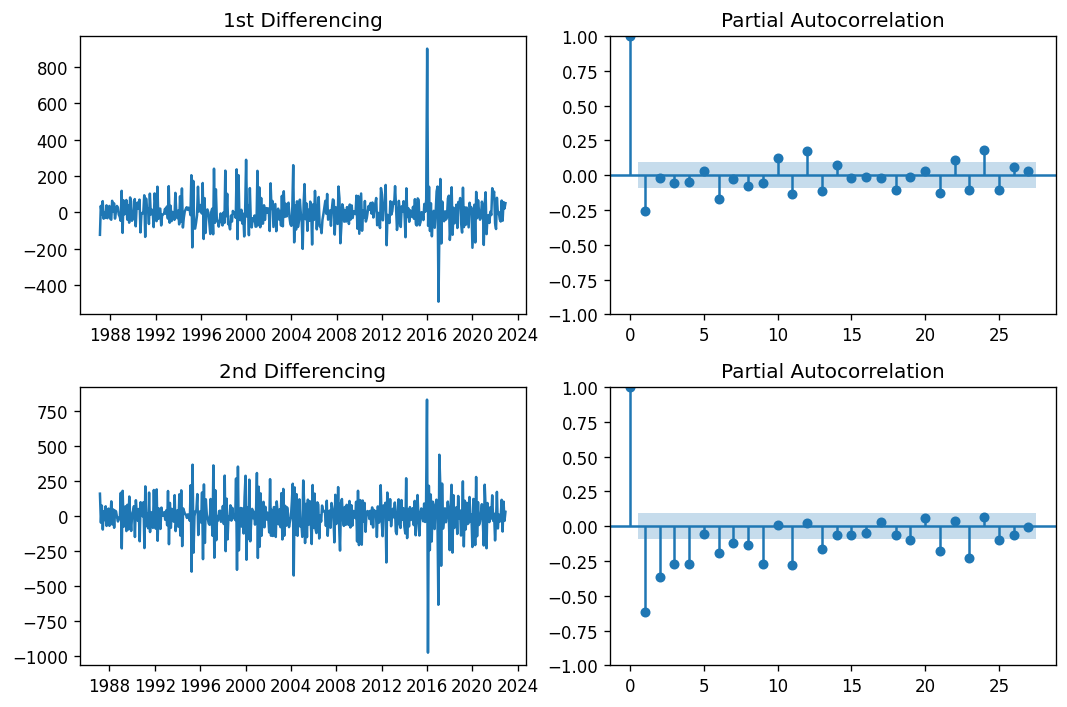

In [ ]:
##FOR IMPLEMENTING ARIMA MODEL

plt.rcParams.update({'figure.figsize':(9,6), 'figure.dpi':120})

fig, axes = plt.subplots(2, 2, sharex=False)

# PACF plot of 1st differenced series
axes[0,0].plot(industry_oil_data['emissions_tons'].diff()); axes[0,0].set_title('1st Differencing')
axes[0,1].set(ylim=(0,5))
plot_pacf(industry_oil_data['emissions_tons'].diff().dropna(), ax=axes[0,1])

# PACF plot of 2nd differenced series
axes[1,0].plot(industry_oil_data['emissions_tons'].diff().diff()); axes[1,0].set_title('2nd Differencing')
axes[1,1].set(ylim=(0,5))
plot_pacf(industry_oil_data['emissions_tons'].diff().diff().dropna(), ax=axes[1,1])
plt.tight_layout()
plt.show()

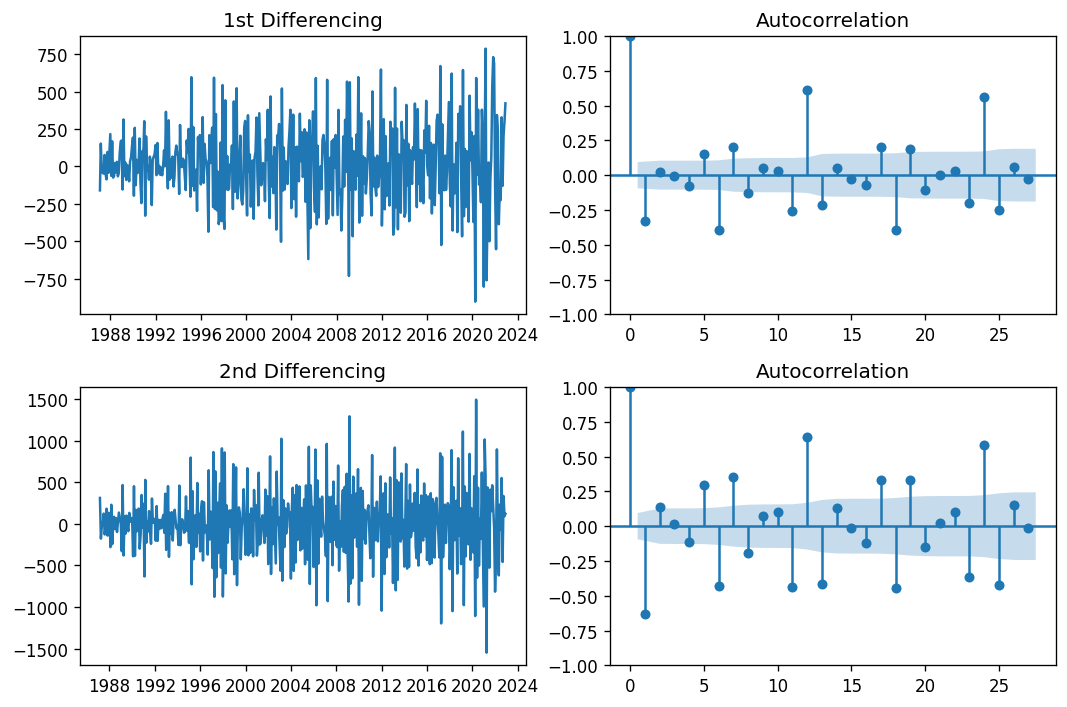

In [ ]:
plt.rcParams.update({'figure.figsize':(9,6), 'figure.dpi':120})

fig, axes = plt.subplots(2, 2, sharex=False)

# ACF plot of 1st differenced series
axes[0,0].plot(transport_oil_data['emissions_tons'].diff()); axes[0,0].set_title('1st Differencing')
axes[0,1].set(ylim=(0,5))
plot_acf(transport_oil_data['emissions_tons'].diff().dropna(), ax=axes[0,1])

# ACF plot of 2nd differenced series
axes[1,0].plot(transport_oil_data['emissions_tons'].diff().diff()); axes[1,0].set_title('2nd Differencing')
axes[1,1].set(ylim=(0,5))
plot_acf(transport_oil_data['emissions_tons'].diff().diff().dropna(), ax=axes[1,1])
plt.tight_layout()
plt.show()

In [ ]:
!pip install pmdarima

arima_model=auto_arima(industry_oil_data["emissions_tons"],
                       start_p=1,d=1,start_q=1,
                       max_p=4,max_q=4,max_d=4,m=12,
                       start_P=1,D=1,start_Q=1,max_P=4,max_D=4,max_Q=4,
                       seasonal=True,
                       trace=True,
                       error_action="ignore",
                       stepwise=True,
                       n_fits=20)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=3.30 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=5156.469, Time=0.08 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=5019.823, Time=0.40 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.90 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=5155.713, Time=0.08 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=4957.308, Time=0.88 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=4938.154, Time=1.90 sec
 ARIMA(1,1,0)(4,1,0)[12]             : AIC=4933.767, Time=3.03 sec
 ARIMA(1,1,0)(4,1,1)[12]             : AIC=inf, Time=16.42 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time=9.47 sec
 ARIMA(0,1,0)(4,1,0)[12]             : AIC=4936.288, Time=2.75 sec
 ARIMA(2,1,0)(4,1,0)[12]             : AIC=4929.676, Time=6.49 sec
 ARIMA(2,1,0)(3,1,0)[12]             : AIC=4933.871, Time=2.52 sec
 ARIMA

In [ ]:
size=int(len(industry_oil_data['emissions_tons'])*0.66)
X_train,X_test=industry_oil_data['emissions_tons'][0:size],industry_oil_data['emissions_tons'][size:len(industry_oil_data['emissions_tons'])]

In [ ]:
X_train.shape


(285,)

In [ ]:
X_test.shape


(147,)

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [ ]:
model=SARIMAX(industry_oil_data['emissions_tons'],
             order=(0,1,2),
             seasonal_order=(2,1,1,12))
result=model.fit()
result.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                       emissions_tons   No. Observations:                  432
Model:             SARIMAX(0, 1, 2)x(2, 1, [1], 12)   Log Likelihood               -2446.453
Date:                              Fri, 16 Jun 2023   AIC                           4904.906
Time:                                      10:57:44   BIC                           4929.133
Sample:                                  01-01-1987   HQIC                          4914.482
                                       - 12-01-2022                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1162      0.050     -2.308      0.021      -0.215      -0.018
ma.L2         -0.1135      0.046     -2.483      0.013      -0.203      -0.024
ar.S.L12       0.0239      0.037      0.650      0.516      -0.048       0.096
ar.S.L24       0.0855      0.041      2.071      0.038       0.005       0.166
ma.S.L12      -0.9988      1.882     -0.531      0.596      -4.687       2.690
sigma2      6277.0967   1.16e+04      0.540      0.589   -1.65e+04    2.91e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             27251.29
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               4.12   Skew:                             2.55
Prob(H) (two-sided):                  0.00   Kurtosis:                        42.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
start_index=0
end_index=len(X_train)-1
train_predction=result.predict(start_index,end_index)
train_predction

1987-01-01      0.000000
1987-02-01    530.925370
1987-03-01    408.434510
1987-04-01    444.943036
1987-05-01    433.254423
                 ...    
2010-05-01    669.581777
2010-06-01    599.773707
2010-07-01    594.738600
2010-08-01    649.272574
2010-09-01    587.090514
Freq: MS, Name: predicted_mean, Length: 285, dtype: float64

In [ ]:
st_index=len(X_train)
ed_index=len(transport_oil_data['emissions_tons'])-1
predction=result.predict(st_index,ed_index)
predction

2010-10-01     609.865402
2010-11-01     552.527134
2010-12-01     624.029873
2011-01-01     645.794247
2011-02-01     643.332713
                 ...     
2022-08-01     973.645596
2022-09-01    1009.246965
2022-10-01    1011.422635
2022-11-01    1044.553772
2022-12-01    1093.859433
Freq: MS, Name: predicted_mean, Length: 147, dtype: float64

In [ ]:
X_test.index = predction.index

<Axes: >

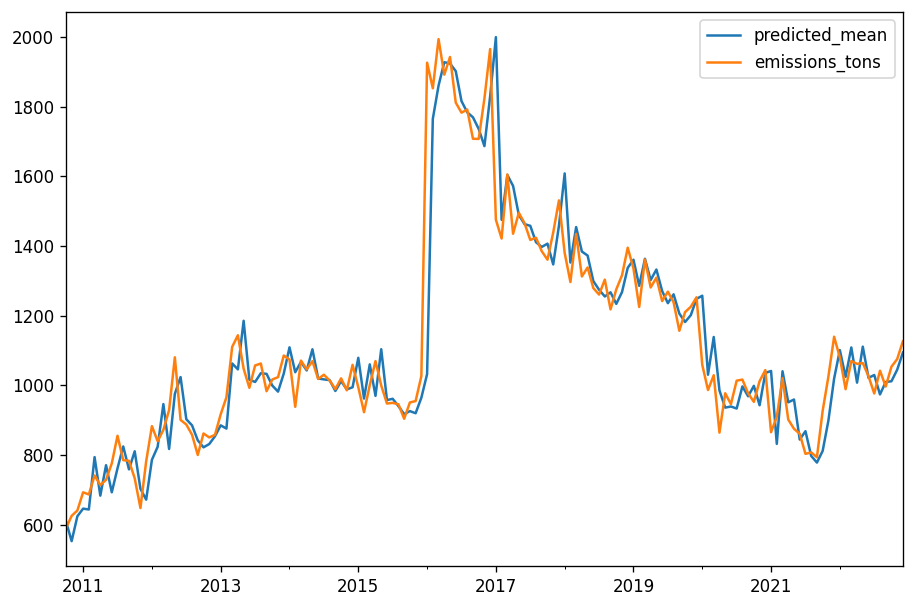

In [ ]:
predction.plot(legend=True)
X_test.plot(legend=True)


In [ ]:
import math
from sklearn.metrics import mean_squared_error

In [ ]:
trainScore=math.sqrt(mean_squared_error(X_train,train_predction))
testScore=math.sqrt(mean_squared_error(X_test,predction))
trainScore,testScore

(72.5326012846207, 107.39902386326196)

In [ ]:
forcast=result.predict(start=len(transport_oil_data['emissions_tons']),
                      end=(len(transport_oil_data['emissions_tons'])-1)+3*12,
                      typ="levels").rename('Forecust')

In [ ]:
print(forcast)

2023-01-01    1111.703559
2023-02-01    1069.245140
2023-03-01    1186.664903
2023-04-01    1124.442708
2023-05-01    1163.120306
2023-06-01    1122.212504
2023-07-01    1109.018314
2023-08-01    1104.314559
2023-09-01    1074.772235
2023-10-01    1108.767356
2023-11-01    1105.761931
2023-12-01    1139.063010
2024-01-01    1142.686842
2024-02-01    1093.417642
2024-03-01    1209.126638
2024-04-01    1155.082423
2024-05-01    1197.096841
2024-06-01    1154.097660
2024-07-01    1142.463672
2024-08-01    1141.325117
2024-09-01    1109.471236
2024-10-01    1136.394913
2024-11-01    1126.263016
2024-12-01    1153.733349
2025-01-01    1161.634131
2025-02-01    1116.345185
2025-03-01    1235.156774
2025-04-01    1176.677631
2025-05-01    1221.873197
2025-06-01    1178.560056
2025-07-01    1170.076574
2025-08-01    1163.029992
2025-09-01    1132.479119
2025-10-01    1157.274784
2025-11-01    1144.844243
2025-12-01    1170.639049
Freq: MS, Name: Forecust, dtype: float64


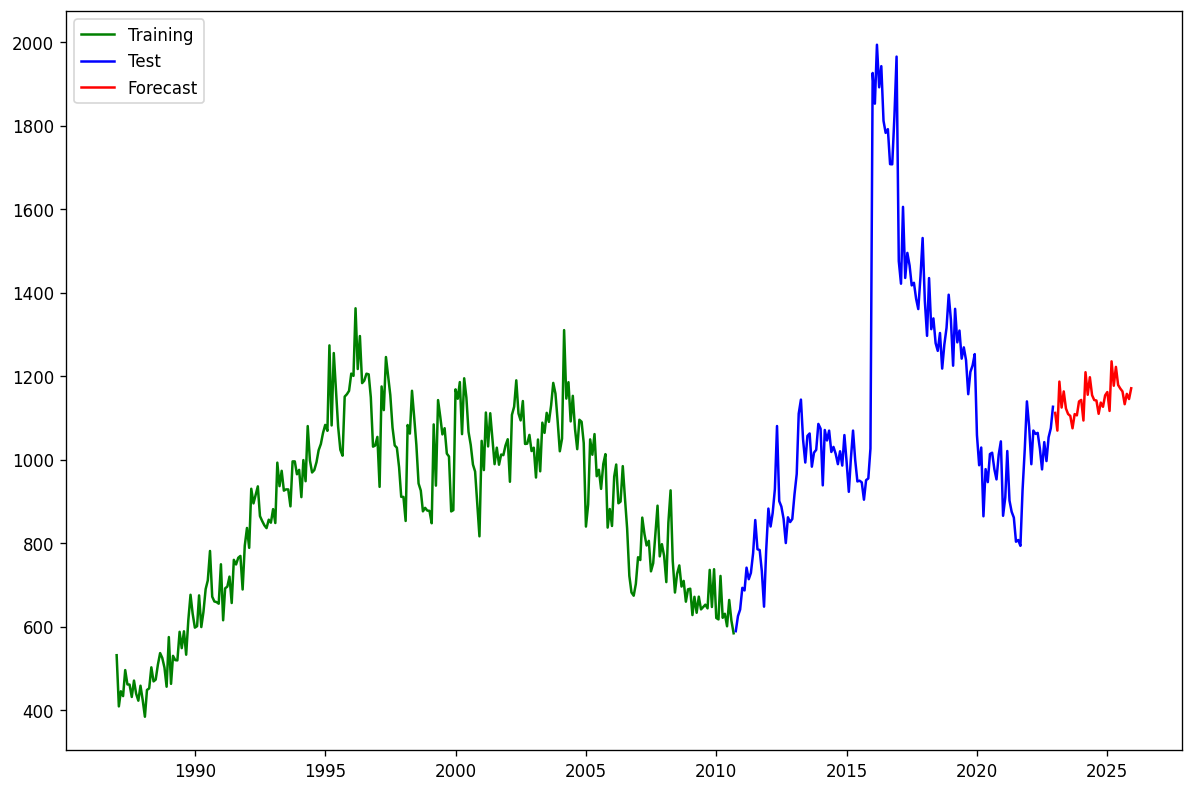

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(X_train,label="Training",color='green')
plt.plot(X_test,label="Test",color='blue')
plt.plot(forcast,label="Forecast",color="red")
plt.legend(loc="upper left")

## OTHER - CATEGORY
### SOURCE (OIL)



In [ ]:
other_oil_data = other_data.loc[other_data['fuel_type'] == 'oil']
other_oil_data = other_oil_data.drop(['source','fuel_type'],axis=1)

In [ ]:
print(other_oil_data)

      year  month  emissions_tons
864   1987      1          587.72
865   1987      2          535.58
866   1987      3          584.31
867   1987      4          565.79
868   1987      5          563.24
...    ...    ...             ...
1291  2022      8         1134.95
1292  2022      9         1070.10
1293  2022     10         1138.38
1294  2022     11         1161.45
1295  2022     12         1222.93

[432 rows x 3 columns]


In [ ]:
other_oil_data['date'] = date_month
other_oil_data["date"]=pd.to_datetime(other_oil_data["date"])
other_oil_data.set_index("date",inplace=True)
other_oil_data

year  month  emissions_tons
date                                   
1987-01-01  1987      1          587.72
1987-02-01  1987      2          535.58
1987-03-01  1987      3          584.31
1987-04-01  1987      4          565.79
1987-05-01  1987      5          563.24
...          ...    ...             ...
2022-08-01  2022      8         1134.95
2022-09-01  2022      9         1070.10
2022-10-01  2022     10         1138.38
2022-11-01  2022     11         1161.45
2022-12-01  2022     12         1222.93

[432 rows x 3 columns]

In [ ]:
#other_oil_data = other_oil_data.drop(['year','month'],axis=1)

Index(['emissions_tons', 'Differenced'], dtype='object')


In [ ]:
other_oil_data.head(5)

emissions_tons
date                      
1987-01-01          587.72
1987-02-01          535.58
1987-03-01          584.31
1987-04-01          565.79
1987-05-01          563.24

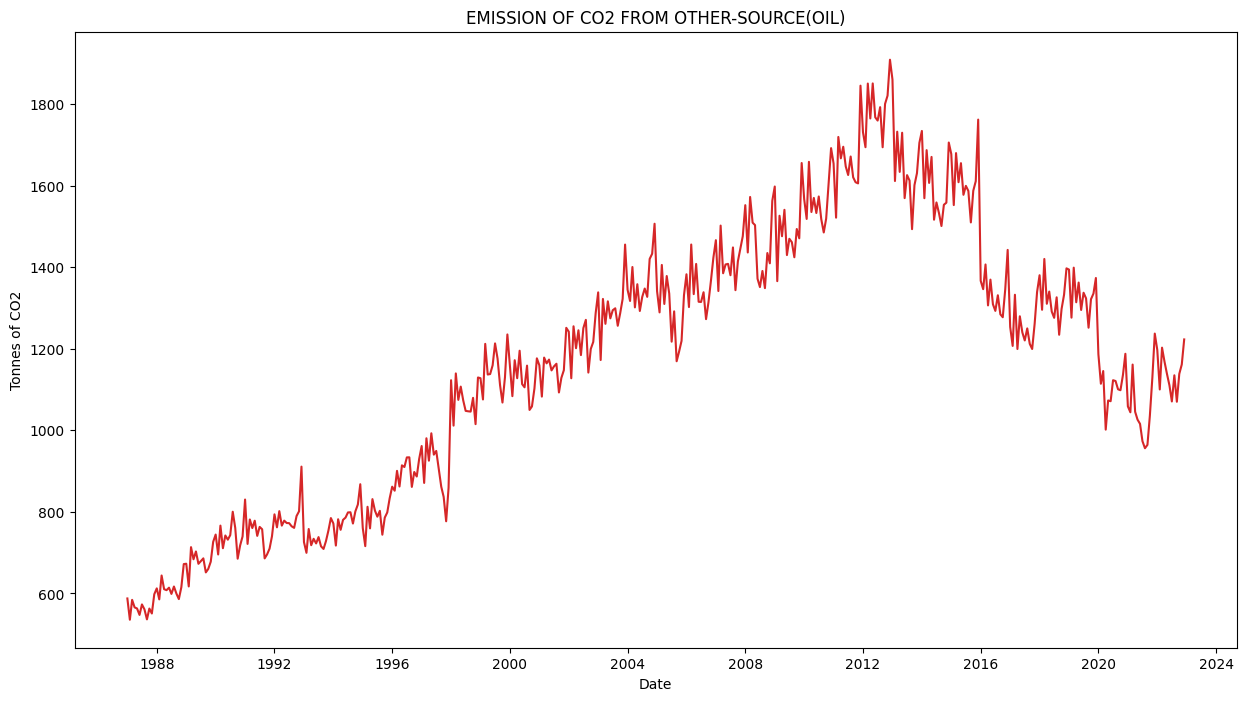

In [ ]:
### Visualizing the series:


def plot_df(df, x, y, title="", xlabel='Date', ylabel='Tonnes of CO2', dpi=100):
    plt.figure(figsize=(15,8), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()


plot_df(other_oil_data, x=other_oil_data.index, y=other_oil_data['emissions_tons'], title='EMISSION OF CO2 FROM OTHER-SOURCE(OIL)')





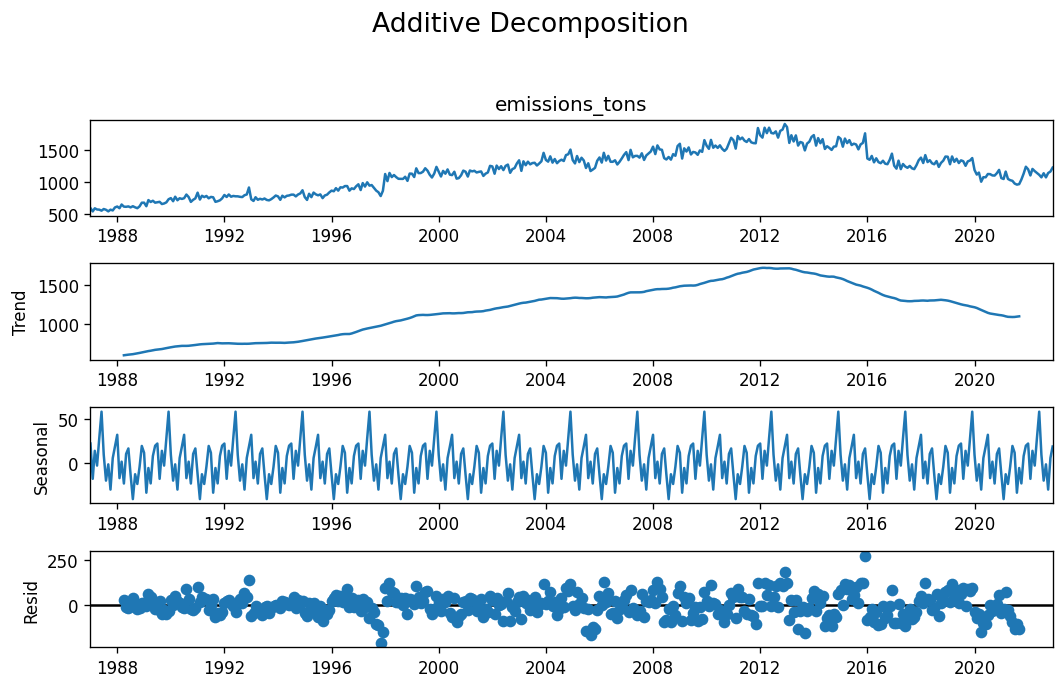

In [ ]:
## DECOMPOSITION OF TIME SERIES:
## CHECKING HOW THE TIME SERIES IS MADE OF

from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


## ADDITIVE

additive_decomposition = seasonal_decompose(other_oil_data['emissions_tons'], model='additive', period=30)

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()


## MULTIPL

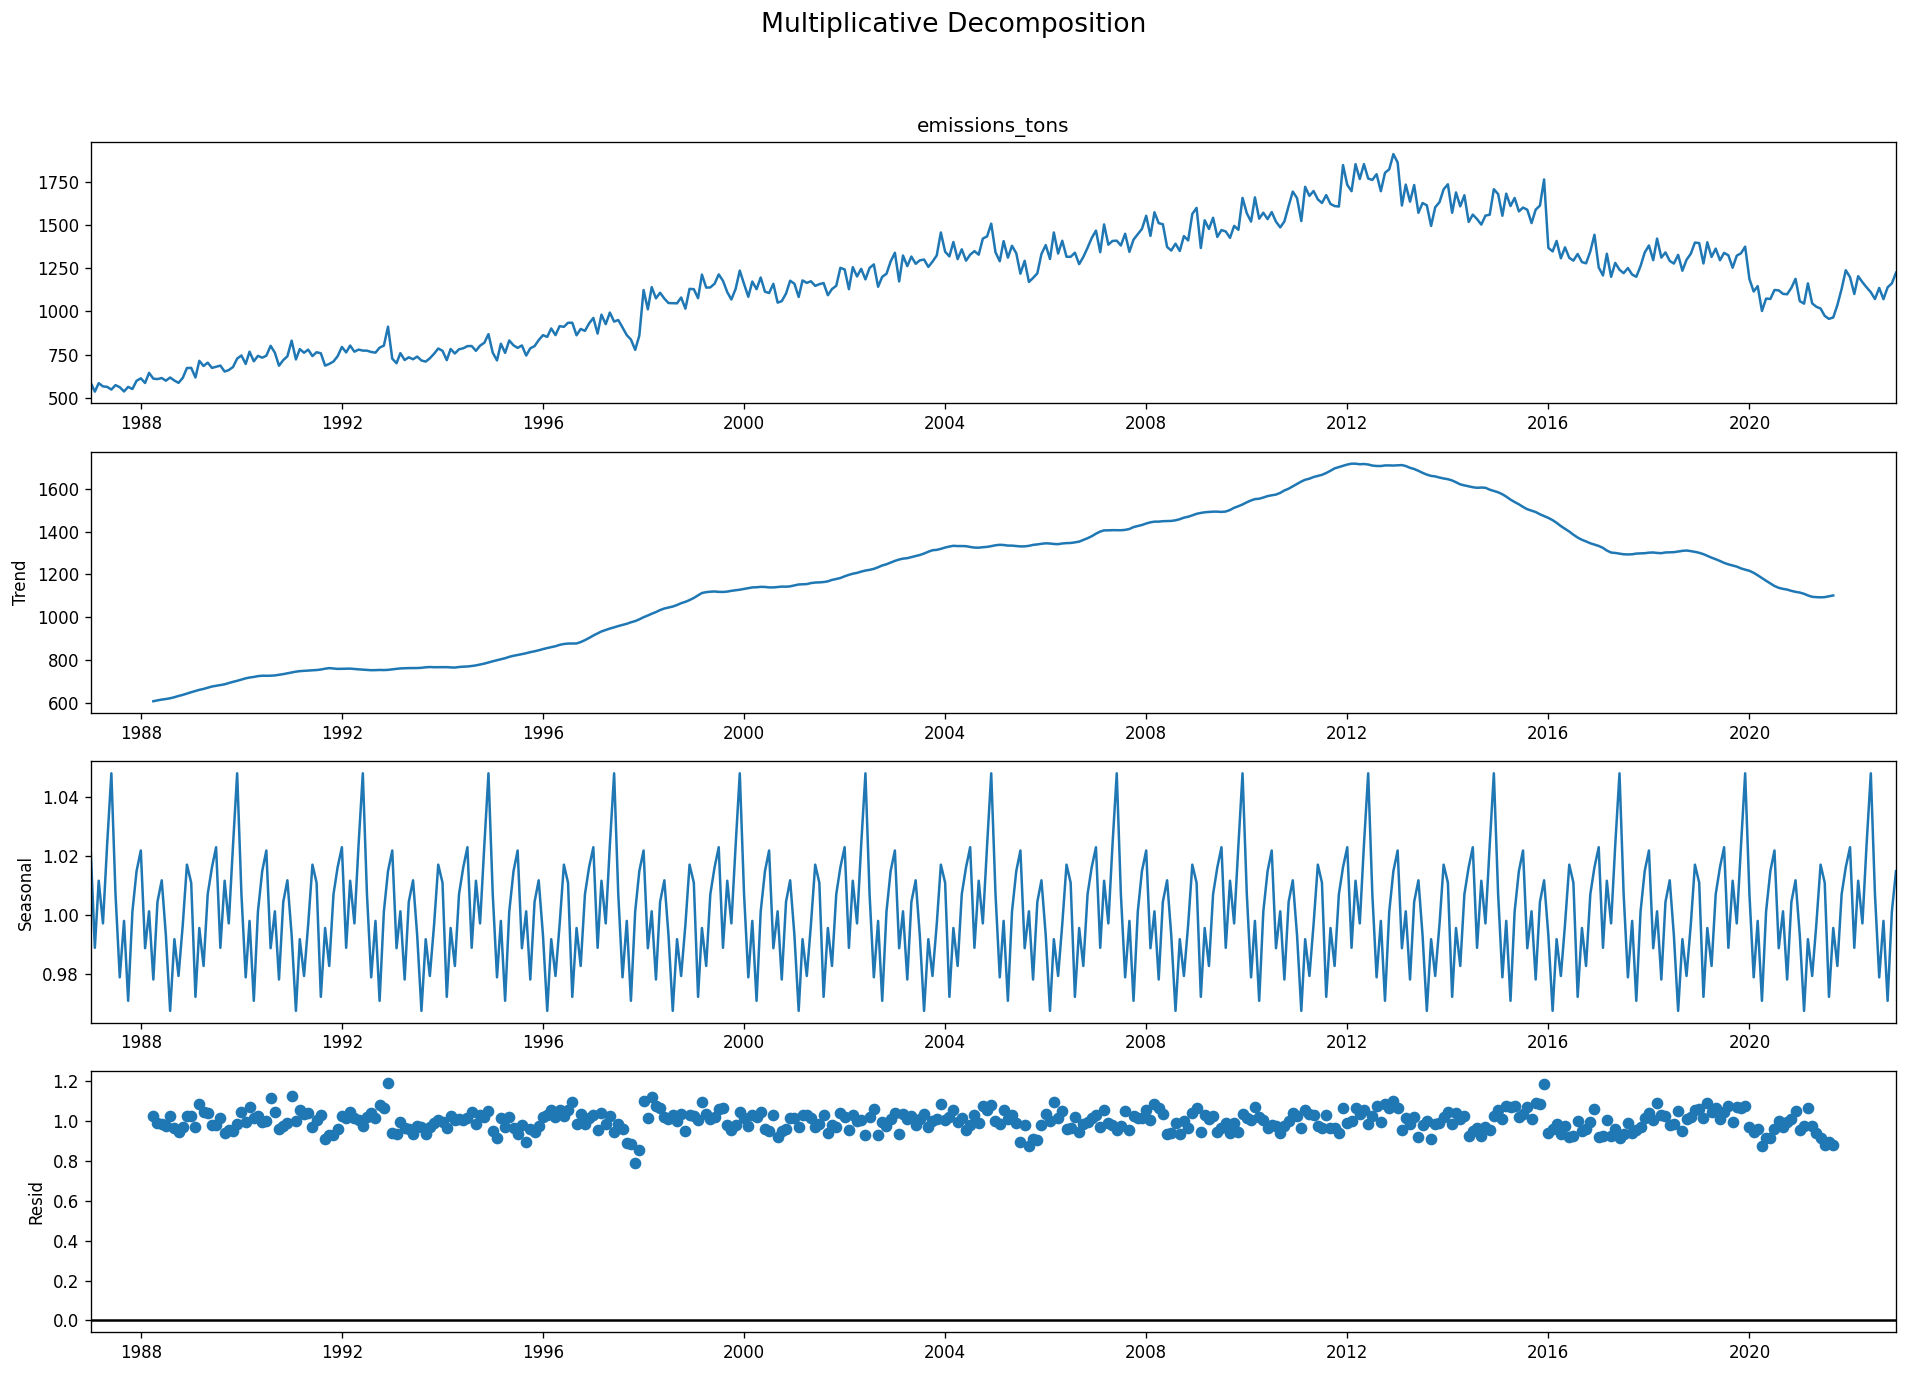

In [ ]:
## MULTIPLICATIVE MODEL:



multiplicative_decomposition = seasonal_decompose(other_oil_data['emissions_tons'], model='multiplicative', period=30)

plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Assuming your time series data is stored in a pandas Series called 'series'
result = adfuller(other_oil_data['emissions_tons'])

# Extract and print the p-value
p_value = result[1]
print("ADF p-value:", p_value)

if  (p_value) > 0.05:
  print("SERIES IS NOT STATIONARY")
else:
  print("SERIES IS STATIONARY")

ADF p-value: 0.36481276971363485
SERIES IS NOT STATIONARY


In [ ]:
## STEPS FOR CONVERTING THE NON STATIONARY TO STATIONARY:


## TAKING THE DIFFERENCING THE SERIES:


other_oil_data['Differenced'] = other_oil_data['emissions_tons'].diff().dropna()



In [ ]:
other_oil_data['Differenced']=other_oil_data['Differenced'].dropna()

In [ ]:
diff_3 = other_oil_data['Differenced'].dropna()

In [ ]:
## AFTER DIFFERENCING :
## CHECKING FOR STATIONARY:

from statsmodels.tsa.stattools import adfuller

# Assuming your time series data is stored in a pandas Series called 'series'
result = adfuller(diff_3)

# Extract and print the p-value
p_value = result[1]
print("ADF p-value:", p_value)

if  (p_value) > 0.05:
  print("SERIES IS NOT STATIONARY")
else:
  print("SERIES IS STATIONARY")



ADF p-value: 1.304712774911031e-05
SERIES IS STATIONARY


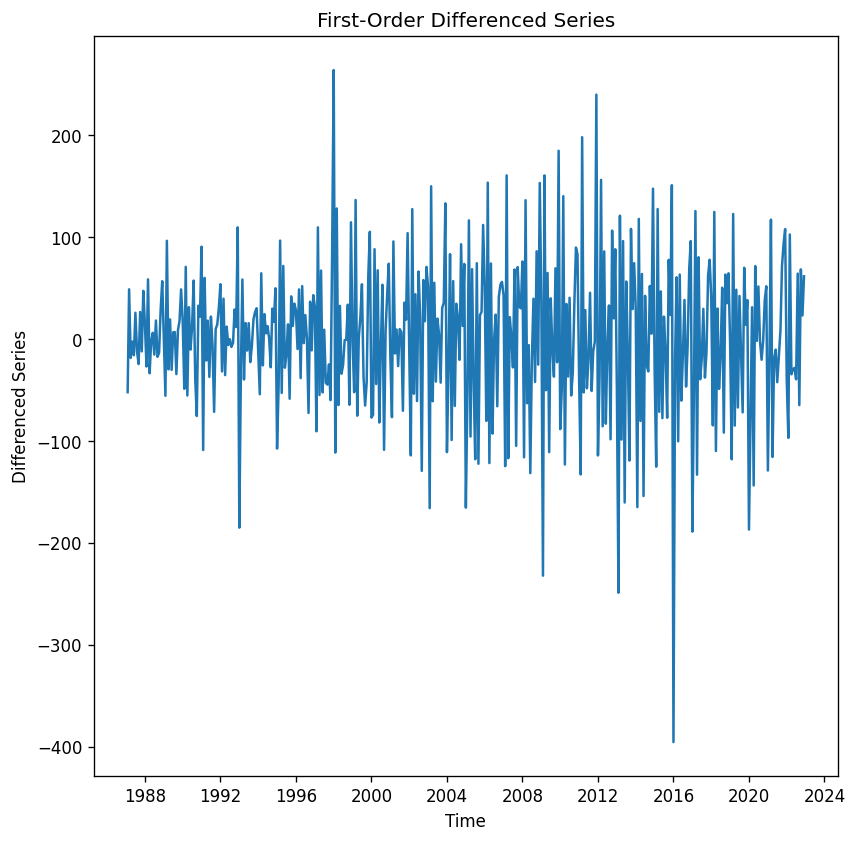

In [ ]:
## VISUALIZING THE DIFFERENCED SERIES:

differenced_series = pd.Series(diff_3)  # Replace [...] with your actual differenced series

# Plot the differenced series
plt.figure(figsize=(8,8))
plt.plot(differenced_series)
plt.xlabel('Time')
plt.ylabel('Differenced Series')
plt.title('First-Order Differenced Series')
plt.show()












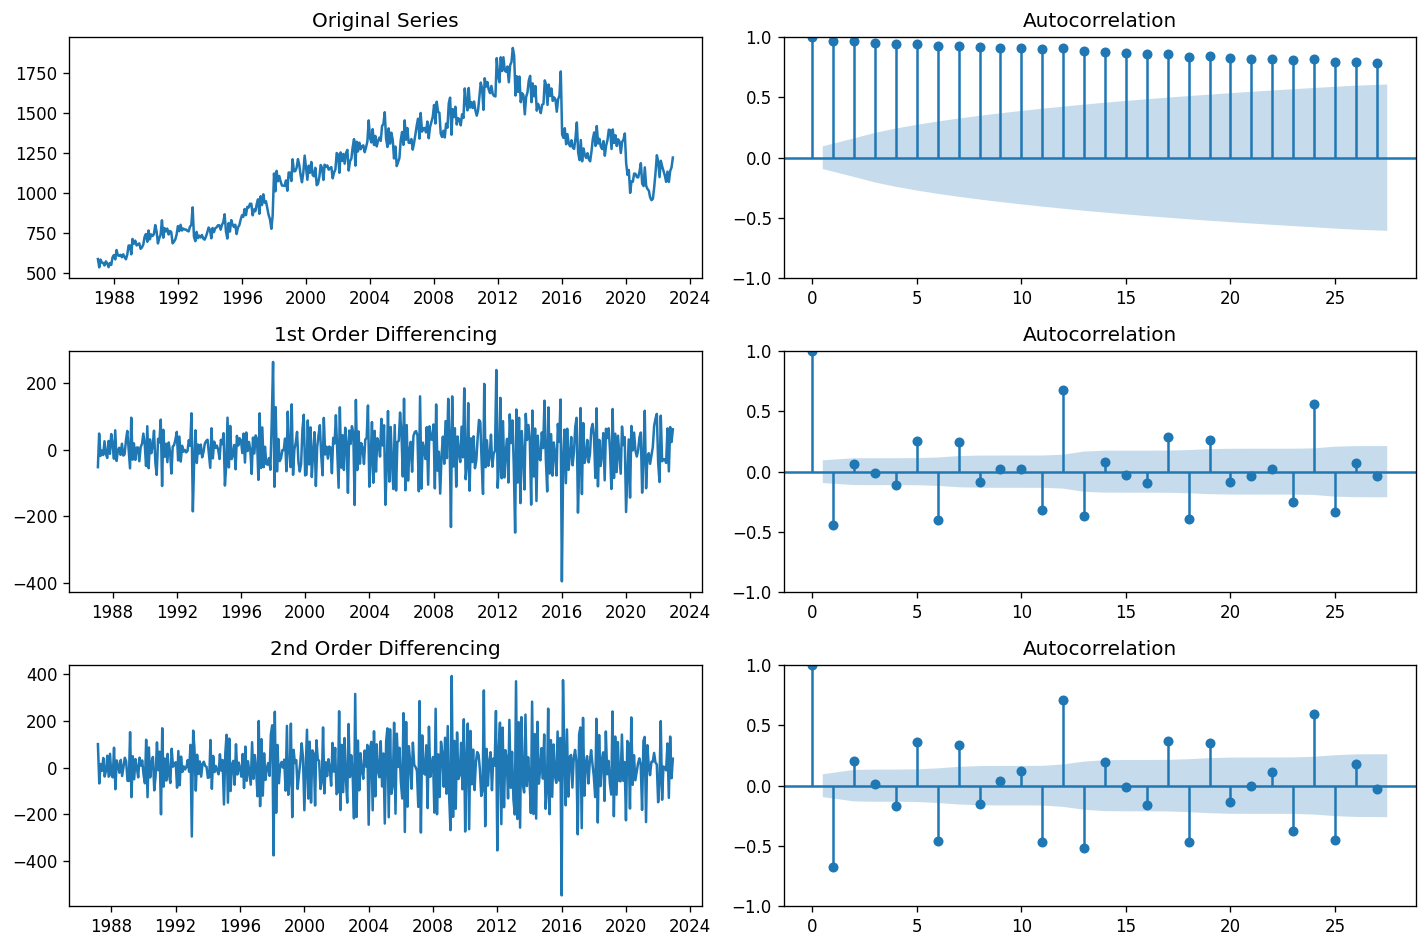

In [ ]:
## IMPLEMENTING THE ARIMA MODEL:

## CALCULATING THE TERMS OF ARIMA:

plt.rcParams.update({'figure.figsize':(12,8), 'figure.dpi':120})


# Original Series
fig, axes = plt.subplots(3, 2, sharex=False)
axes[0, 0].plot(other_oil_data['emissions_tons']); axes[0, 0].set_title('Original Series')
plot_acf(other_oil_data['emissions_tons'].values, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(other_oil_data['emissions_tons'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(other_oil_data['emissions_tons'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(other_oil_data['emissions_tons'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(other_oil_data['emissions_tons'].diff().diff().dropna(), ax=axes[2, 1])

plt.tight_layout()
plt.show()











/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


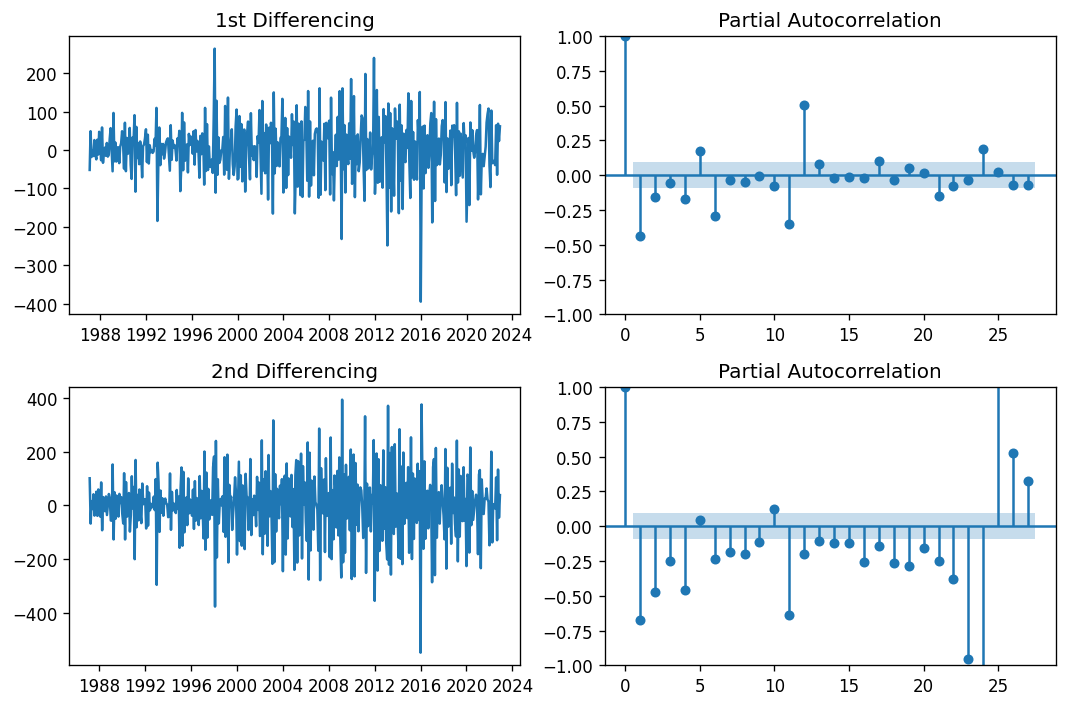

In [ ]:
##FOR IMPLEMENTING ARIMA MODEL

plt.rcParams.update({'figure.figsize':(9,6), 'figure.dpi':120})

fig, axes = plt.subplots(2, 2, sharex=False)

# PACF plot of 1st differenced series
axes[0,0].plot(other_oil_data['emissions_tons'].diff()); axes[0,0].set_title('1st Differencing')
axes[0,1].set(ylim=(0,5))
plot_pacf(other_oil_data['emissions_tons'].diff().dropna(), ax=axes[0,1])

# PACF plot of 2nd differenced series
axes[1,0].plot(other_oil_data['emissions_tons'].diff().diff()); axes[1,0].set_title('2nd Differencing')
axes[1,1].set(ylim=(0,5))
plot_pacf(other_oil_data['emissions_tons'].diff().diff().dropna(), ax=axes[1,1])
plt.tight_layout()
plt.show()

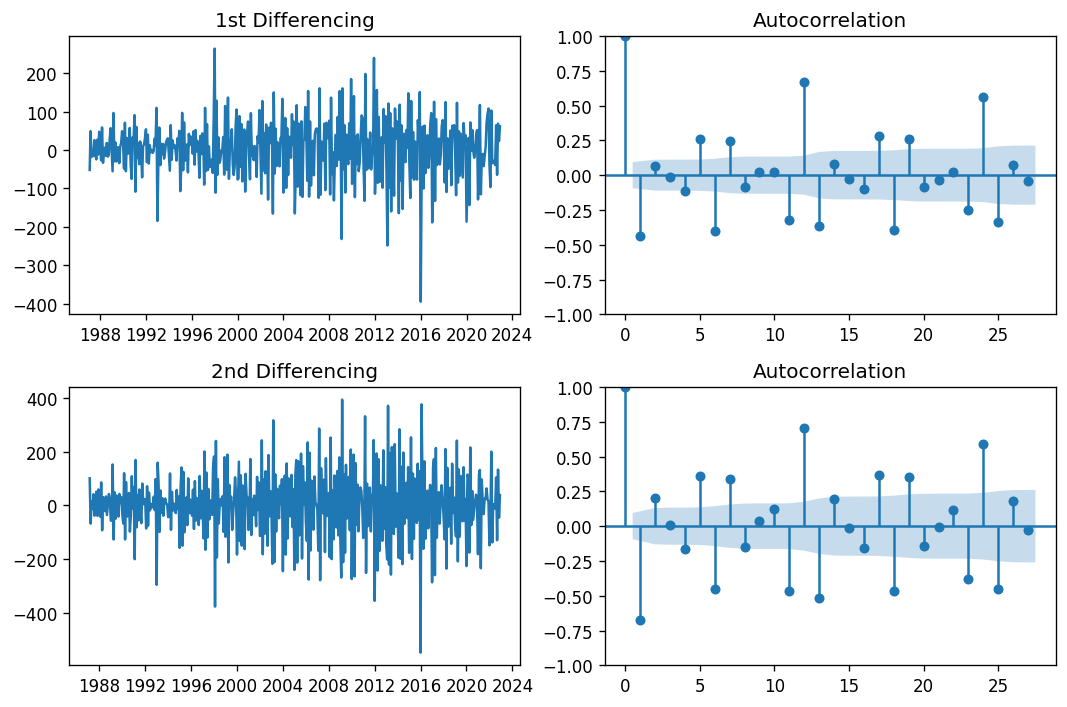

In [ ]:
plt.rcParams.update({'figure.figsize':(9,6), 'figure.dpi':120})

fig, axes = plt.subplots(2, 2, sharex=False)

# ACF plot of 1st differenced series
axes[0,0].plot(other_oil_data['emissions_tons'].diff()); axes[0,0].set_title('1st Differencing')
axes[0,1].set(ylim=(0,5))
plot_acf(other_oil_data['emissions_tons'].diff().dropna(), ax=axes[0,1])

# ACF plot of 2nd differenced series
axes[1,0].plot(other_oil_data['emissions_tons'].diff().diff()); axes[1,0].set_title('2nd Differencing')
axes[1,1].set(ylim=(0,5))
plot_acf(other_oil_data['emissions_tons'].diff().diff().dropna(), ax=axes[1,1])
plt.tight_layout()
plt.show()

In [ ]:
#!pip install pmdarima

arima_model=auto_arima(other_oil_data["emissions_tons"],
                       start_p=1,d=1,start_q=1,
                       max_p=4,max_q=4,max_d=4,m=12,
                       start_P=1,D=1,start_Q=1,max_P=4,max_D=4,max_Q=4,
                       seasonal=True,
                       trace=True,
                       error_action="ignore",
                       stepwise=True,
                       n_fits=20)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=4431.206, Time=3.65 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4636.618, Time=0.10 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4545.504, Time=0.57 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=4431.906, Time=1.09 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=4433.513, Time=1.35 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=4546.193, Time=0.47 sec
 ARIMA(1,1,1)(2,1,1)[12]             : AIC=4425.245, Time=6.58 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=4498.513, Time=1.59 sec
 ARIMA(1,1,1)(3,1,1)[12]             : AIC=4424.049, Time=12.02 sec
 ARIMA(1,1,1)(3,1,0)[12]             : AIC=4451.088, Time=4.39 sec
 ARIMA(1,1,1)(4,1,1)[12]             : AIC=4424.821, Time=37.27 sec
 ARIMA(1,1,1)(3,1,2)[12]             : AIC=4422.458, Time=22.36 sec
 ARIMA(1,1,1)(2,1,2)[12]             : AIC=4425.618, Time=9.11 sec
 ARIMA(1,1,1)(4,1,2)[12]             : AIC=4424.447, Time=36.74 sec
 ARIMA(1,1,1)(3

In [ ]:
size=int(len(other_oil_data['emissions_tons'])*0.66)
X_train,X_test=other_oil_data['emissions_tons'][0:size],other_oil_data['emissions_tons'][size:len(other_oil_data['emissions_tons'])]

In [ ]:
X_train.shape


(285,)

In [ ]:
X_test.shape


(147,)

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [ ]:
model=SARIMAX(other_oil_data['emissions_tons'],
             order=(0,1,1),
             seasonal_order=(2,1,1,12))
result=model.fit()
result.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                     emissions_tons   No. Observations:                  432
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood               -2206.636
Date:                            Fri, 16 Jun 2023   AIC                           4423.272
Time:                                    11:26:22   BIC                           4443.462
Sample:                                01-01-1987   HQIC                          4431.253
                                     - 12-01-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3294      0.047     -6.959      0.000      -0.422      -0.237
ar.S.L12       0.0761      0.050      1.511      0.131      -0.023       0.175
ar.S.L24      -0.1634      0.037     -4.403      0.000      -0.236      -0.091
ma.S.L12      -0.8034      0.035    -22.666      0.000      -0.873      -0.734
sigma2      2123.7153     60.093     35.340      0.000    2005.935    2241.496
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              2331.70
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               1.61   Skew:                            -0.99
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
start_index=0
end_index=len(X_train)-1
train_predction=result.predict(start_index,end_index)
train_predction

1987-01-01       0.000000
1987-02-01     587.393863
1987-03-01     535.637398
1987-04-01     584.256082
1987-05-01     565.810456
                 ...     
2010-05-01    1601.047331
2010-06-01    1521.639653
2010-07-01    1534.049455
2010-08-01    1580.583310
2010-09-01    1472.644805
Freq: MS, Name: predicted_mean, Length: 285, dtype: float64

In [ ]:
st_index=len(X_train)
ed_index=len(transport_oil_data['emissions_tons'])-1
predction=result.predict(st_index,ed_index)
predction

2010-10-01    1529.670517
2010-11-01    1536.631489
2010-12-01    1687.212455
2011-01-01    1670.656042
2011-02-01    1582.725782
                 ...     
2022-08-01    1086.025499
2022-09-01    1071.584967
2022-10-01    1126.024036
2022-11-01    1182.392099
2022-12-01    1263.674261
Freq: MS, Name: predicted_mean, Length: 147, dtype: float64

In [ ]:
X_test.index = predction.index

<Axes: >

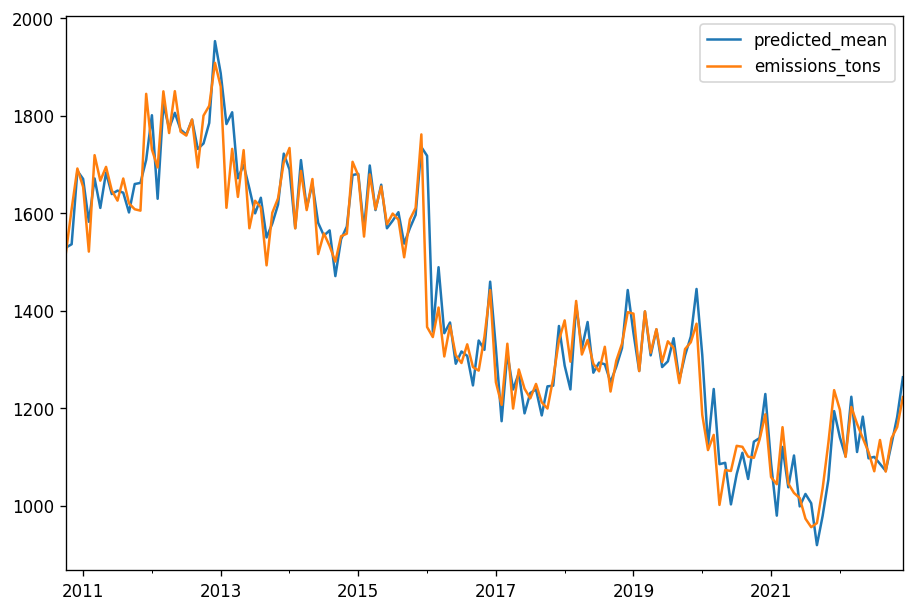

In [ ]:
predction.plot(legend=True)
X_test.plot(legend=True)


In [ ]:
import math
from sklearn.metrics import mean_squared_error

In [ ]:
trainScore=math.sqrt(mean_squared_error(X_train,train_predction))
testScore=math.sqrt(mean_squared_error(X_test,predction))
trainScore,testScore

(57.36664143230535, 51.880274341619376)

In [ ]:
forcast=result.predict(start=len(transport_oil_data['emissions_tons']),
                      end=(len(transport_oil_data['emissions_tons'])-1)+3*12,
                      typ="levels").rename('Forecust')

In [ ]:
print(forcast)

2023-01-01    1159.426052
2023-02-01    1062.816610
2023-03-01    1166.647982
2023-04-01    1081.622937
2023-05-01    1117.022031
2023-06-01    1066.580583
2023-07-01    1069.782028
2023-08-01    1095.528104
2023-09-01    1034.572266
2023-10-01    1080.223741
2023-11-01    1108.904406
2023-12-01    1184.891396
2024-01-01    1094.298743
2024-02-01    1011.169249
2024-03-01    1117.476656
2024-04-01    1015.362039
2024-05-01    1057.366058
2024-06-01    1008.167456
2024-07-01    1014.161110
2024-08-01    1023.659820
2024-09-01     974.954448
2024-10-01    1019.415988
2024-11-01    1060.028507
2024-12-01    1144.685624
2025-01-01    1055.857770
2025-02-01     973.705296
2025-03-01    1079.985307
2025-04-01     984.811175
2025-05-01    1016.711920
2025-06-01     971.220349
2025-07-01     970.448637
2025-08-01     984.983109
2025-09-01     936.574066
2025-10-01     984.641926
2025-11-01    1025.246089
2025-12-01    1108.193139
Freq: MS, Name: Forecust, dtype: float64


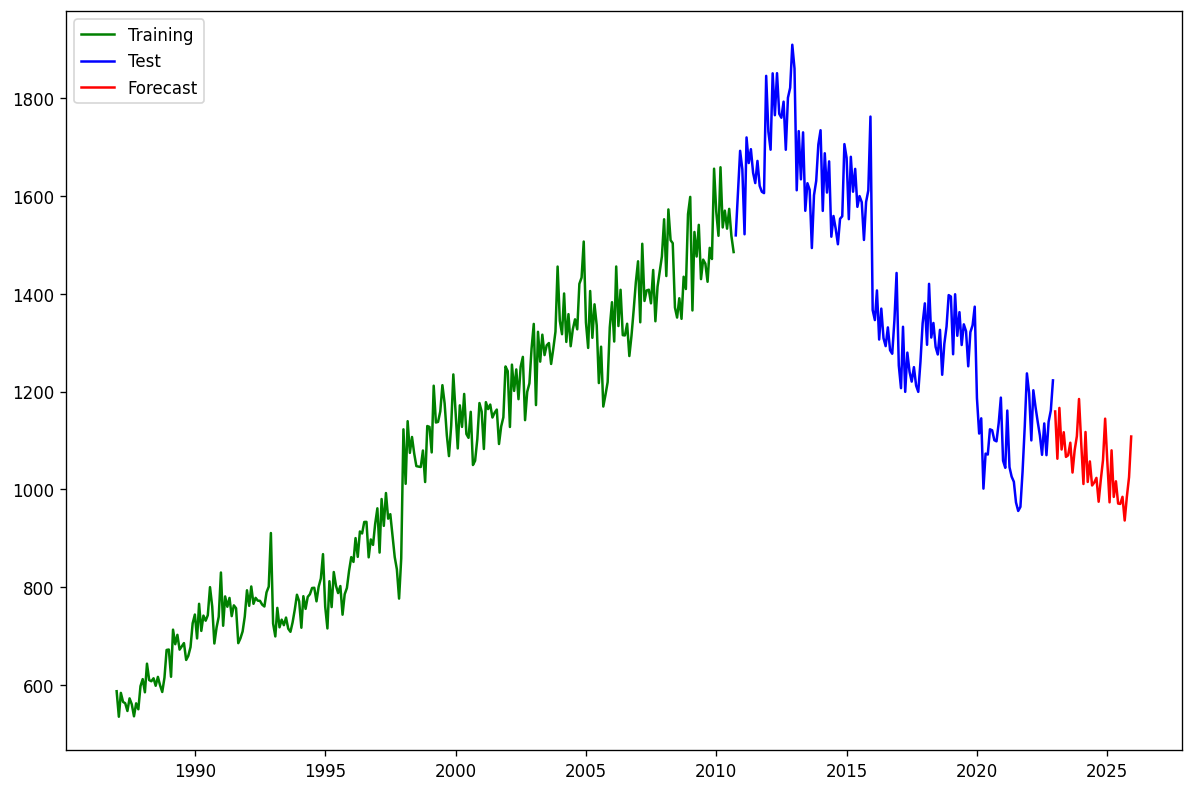

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(X_train,label="Training",color='green')
plt.plot(X_test,label="Test",color='blue')
plt.plot(forcast,label="Forecast",color="red")
plt.legend(loc="upper left")